In [1]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy

In [2]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\SubjectiveScores\Subject_Block_Session_Fatigue.xlsx'
#corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Subject_Block_Session_PupilSizeCorrelation.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)

#df['TimeNotWriting'] = 

#corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
#corr_short = corr[corr.Correlation>0.75]


In [3]:
#df1 = df.merge(corr_short, on=['Subject','Block', 'Session'])
df1 = copy.deepcopy(df) # for performance, correlation between R,L pupil size should not matter 

In [19]:
df1

,0,Subject,DayDT,DayNr,Day,Session,SessionDifficulty,FatigueBeforeEye,FatigueBefore,FatigueAfter,FatigueDuring,FatigueDifference,FatigueDifference_day
0,1,ac,1,1,1,1,E,NaN,3.0,4.0,5.0,1,NaN
1,1,ac,1,1,1,2,D,NaN,4.0,5.0,5.0,1,2.0
2,2,ac,2,2,2,1,D,NaN,4.0,3.0,4.0,-1,NaN
3,2,ac,2,2,2,2,E,NaN,3.0,3.0,4.0,0,-1.0
4,3,ac,0,0,3_MS,1,E,NaN,2.0,2.0,2.0,0,NaN
5,3,ac,0,0,3_MS,2,D,NaN,2.0,2.0,4.0,0,0.0
6,4,ac,3,4,4,1,D,NaN,3.0,3.0,3.0,0,NaN
7,4,ac,3,4,4,2,E,NaN,3.0,3.0,4.0,0,0.0
8,5,ac,4,5,5,1,E,NaN,4.0,4.0,4.0,0,NaN
9,5,ac,4,5,5,2,D,NaN,4.0,4.0,5.0,0,0.0


# Box plots of fatigue during easy and difficult sessions

In [22]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDifference']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#       meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.2, 2])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\fatigueDifference.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [24]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDifference']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.Session==1].mean(), yerr = \
                 df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='gray', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Session==2].mean(), yerr = \
                 df1[variable][df1.Session==2].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='gray', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session1', 'Session2'])
ax1.set_ylim([0, 1])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\FatigueDifference_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [43]:
plt.rcParams.update({'font.size': 12})
boxplot = df1.boxplot(column='FatigueDifference', sym='', by='SessionDifficulty', showmeans=True)
plt.ylabel('Fatigue Score Difference')

Text(0, 0.5, 'Fatigue Score Difference')

# Fatigue Before

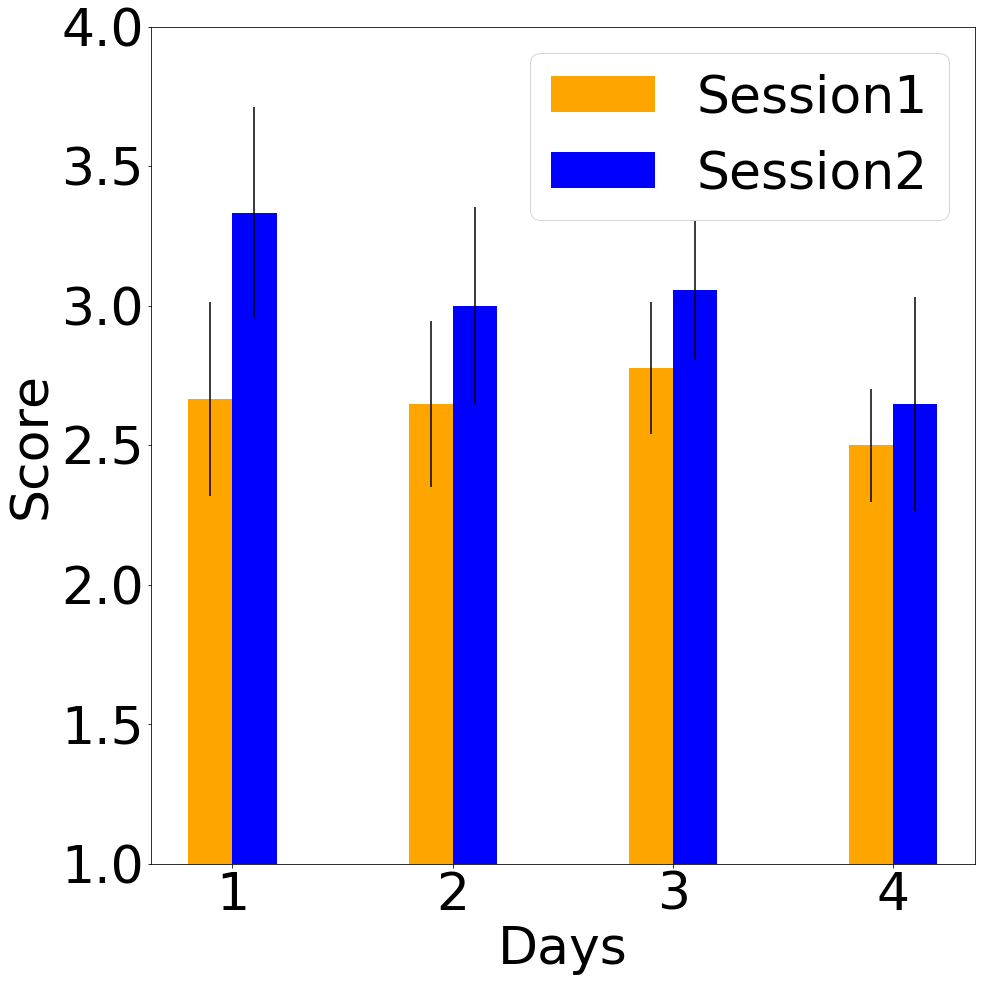

In [5]:
PlotTitle = 'FatigueBefore'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.Session==1, df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueBefore'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 4])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueBefore_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

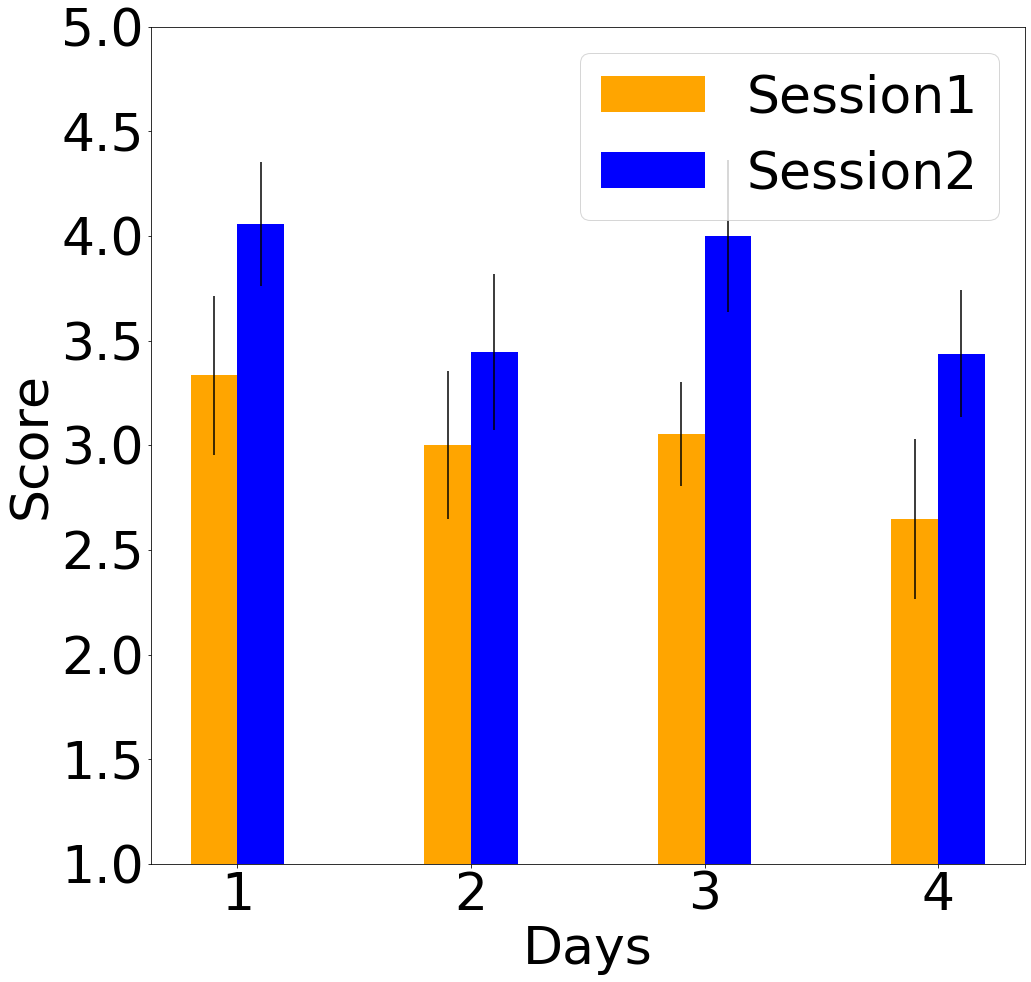

In [8]:
PlotTitle = 'FatigueAfter'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.Session==1, df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueAfter'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 5])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueAfter_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

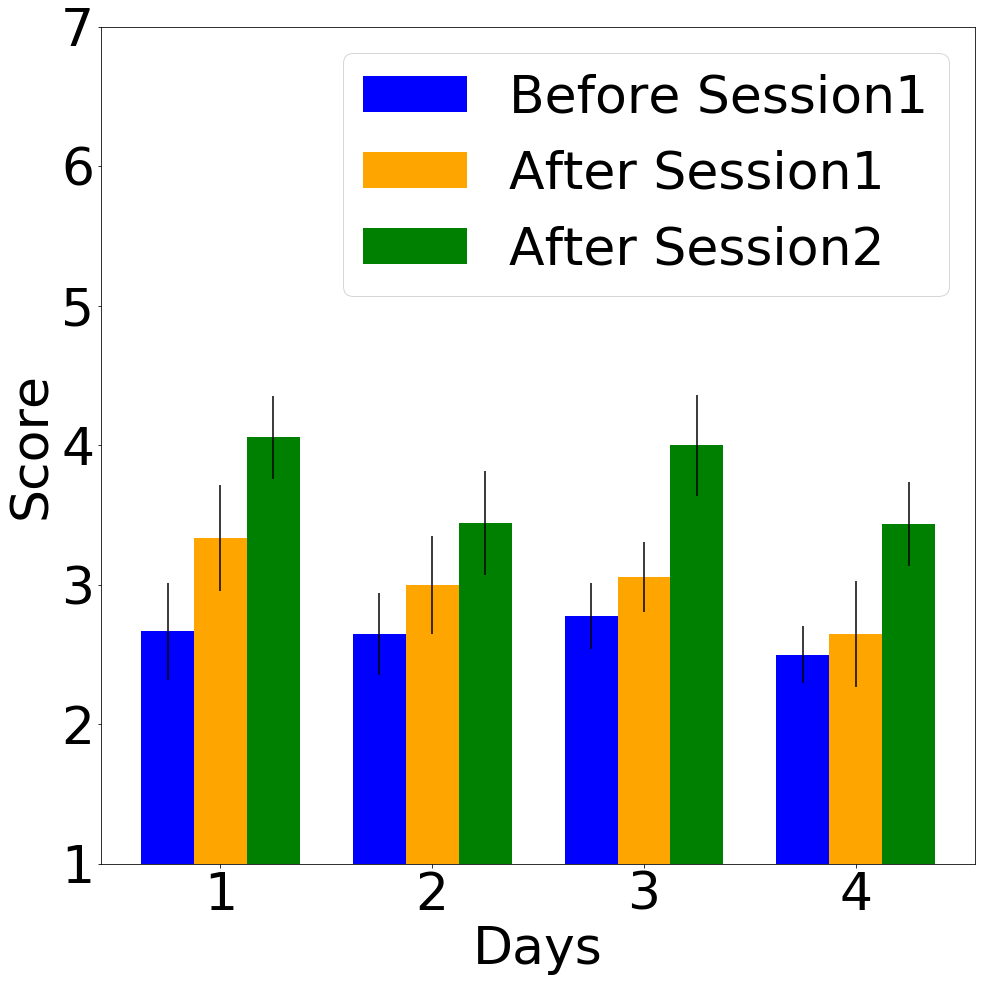

In [12]:
PlotTitle = 'FatigueAfter'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.Session==1, df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [0, 2, 4, 6]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueAfter'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
        
    p0 = ax1.bar(x_inds[indDay-1], df1['FatigueBefore'][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1['FatigueBefore'][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1['FatigueBefore'][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    p1 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+1, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='green', width=0.5)
    
    
ax1.set_xticks([0.5, 2.5, 4.5, 6.5])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p0, p1, p2), ('Before Session1', 'After Session1', 'After Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueTrend_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Fatigue During

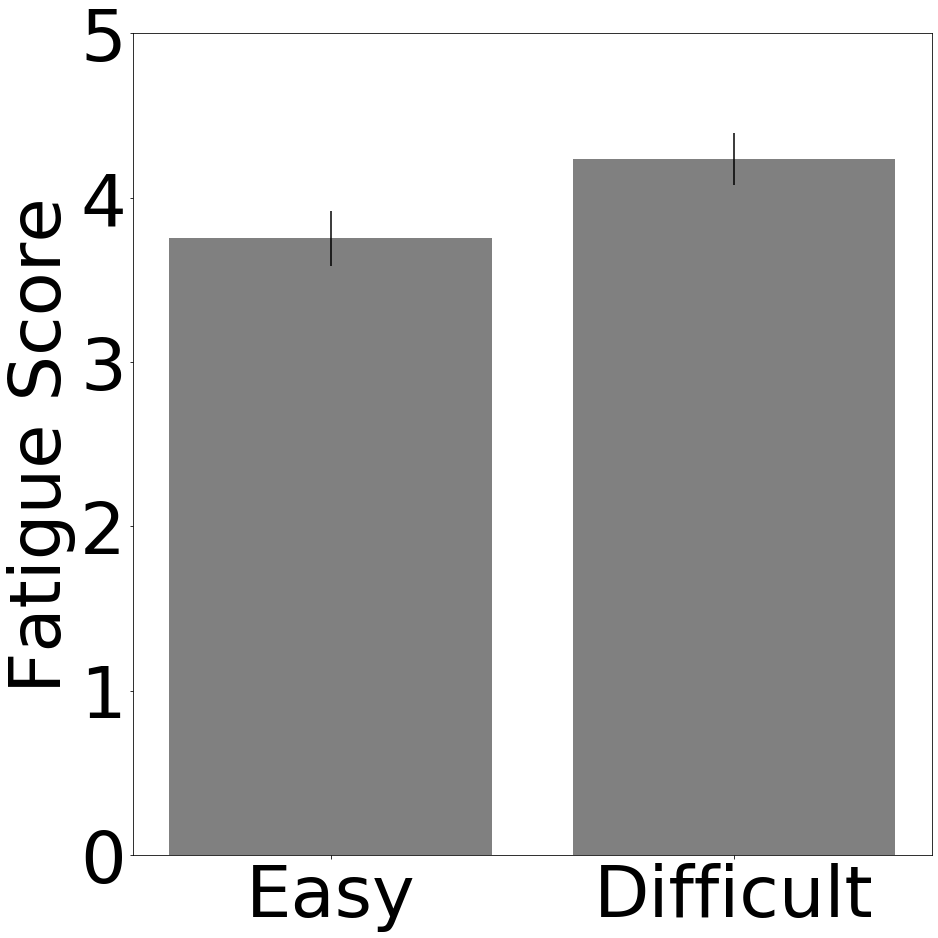

In [13]:
PlotTitle = 'FatigueDuring'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDuring']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()\
                                                                        ), color='gray', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()\
                                                                        ), color='gray', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 5])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\fatigueDuring.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

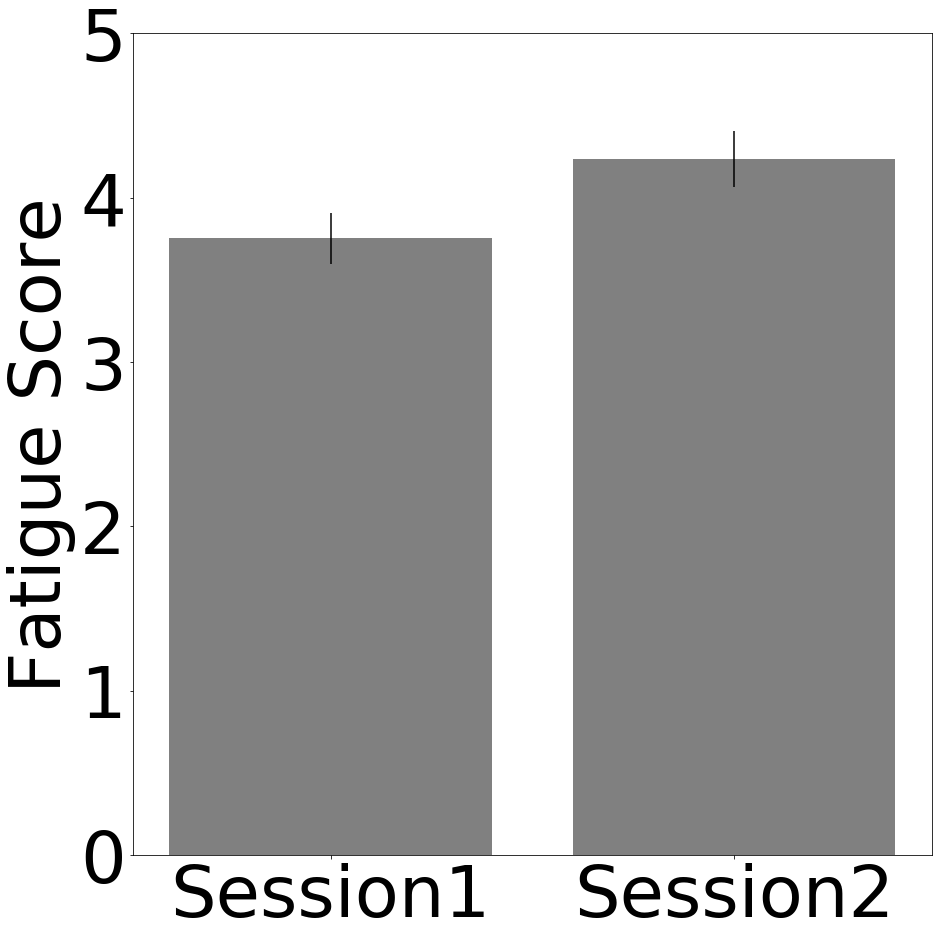

In [12]:
PlotTitle = 'FatigueDuring'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDuring']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.Session==1].mean(), yerr = \
                 df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='gray', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Session==2].mean(), yerr = \
                 df1[variable][df1.Session==2].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='gray', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session1', 'Session2'])
ax1.set_ylim([0, 5])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\fatigueDuring_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [44]:
plt.rcParams.update({'font.size': 12})
boxplot = df1.boxplot(column='FatigueDuring', sym='', by='SessionDifficulty', showmeans=True)
plt.ylabel('Fatigue Score')

Text(0, 0.5, 'Fatigue Score')

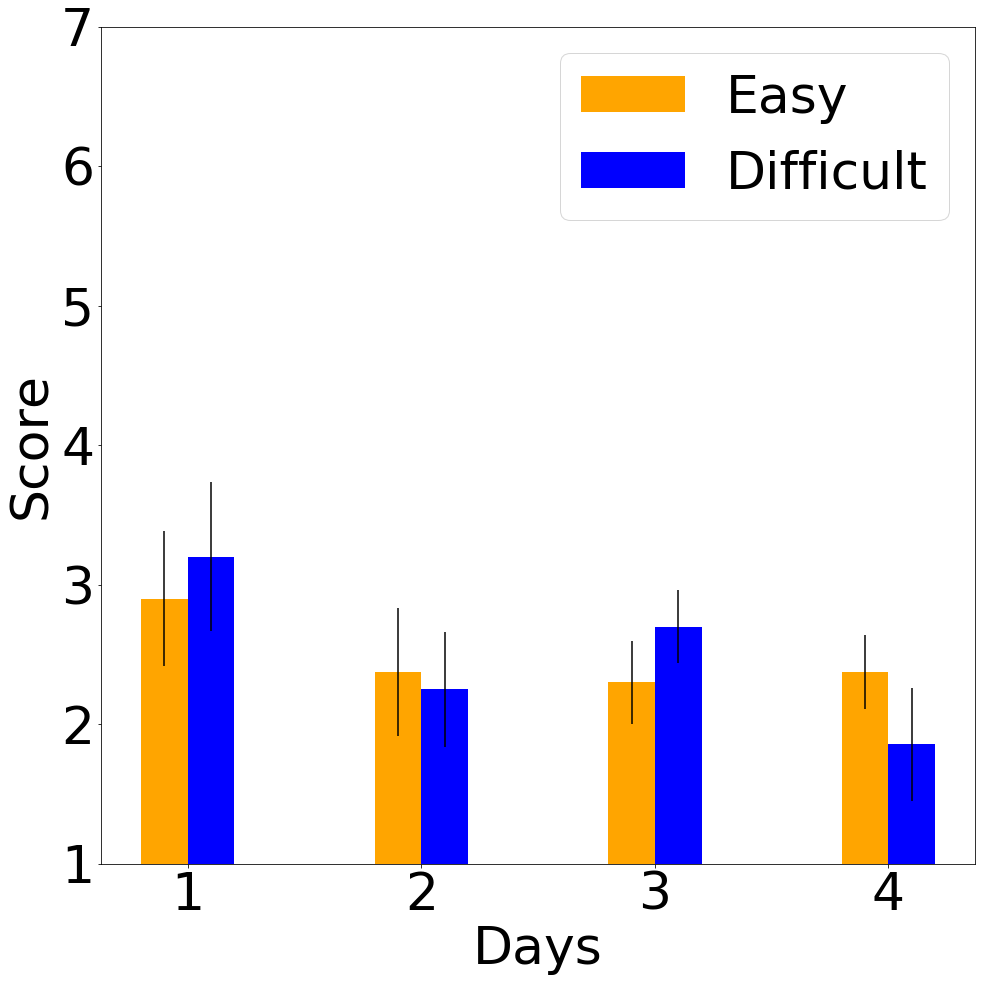

In [9]:
PlotTitle = 'FatigueBefore'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueBefore'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==1)].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==1)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==1)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==2)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==2)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==2)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueBefore_blocks_easySession1.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

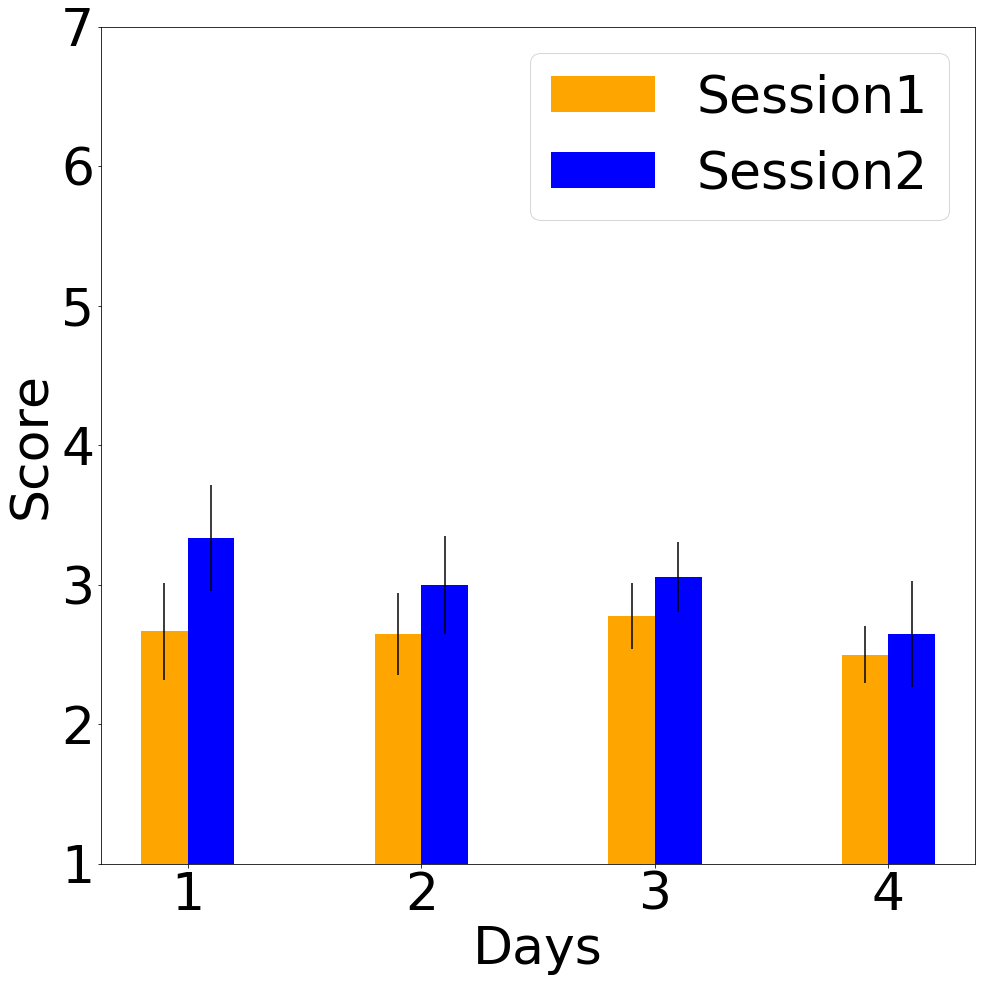

In [14]:
PlotTitle = 'FatigueBefore'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueBefore'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueBefore_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

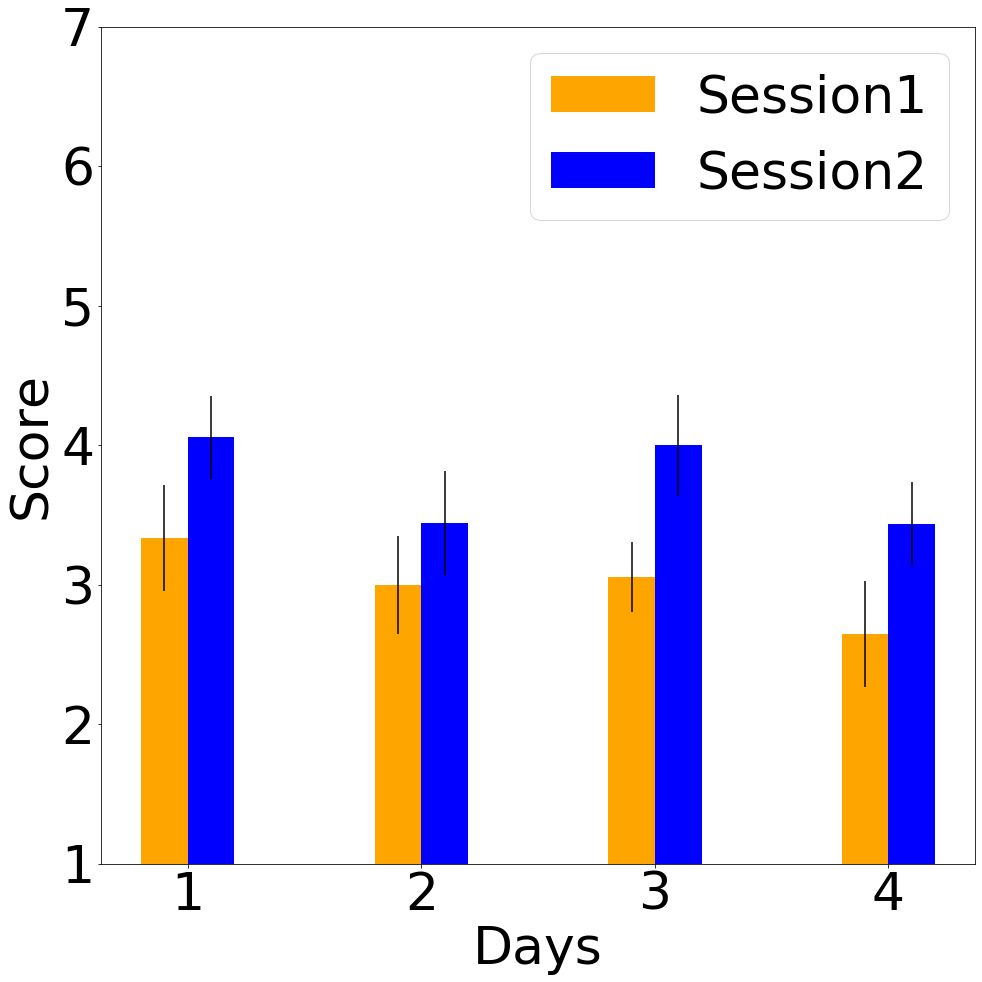

In [15]:
PlotTitle = 'FatigueAfter'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueAfter'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueAfter_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

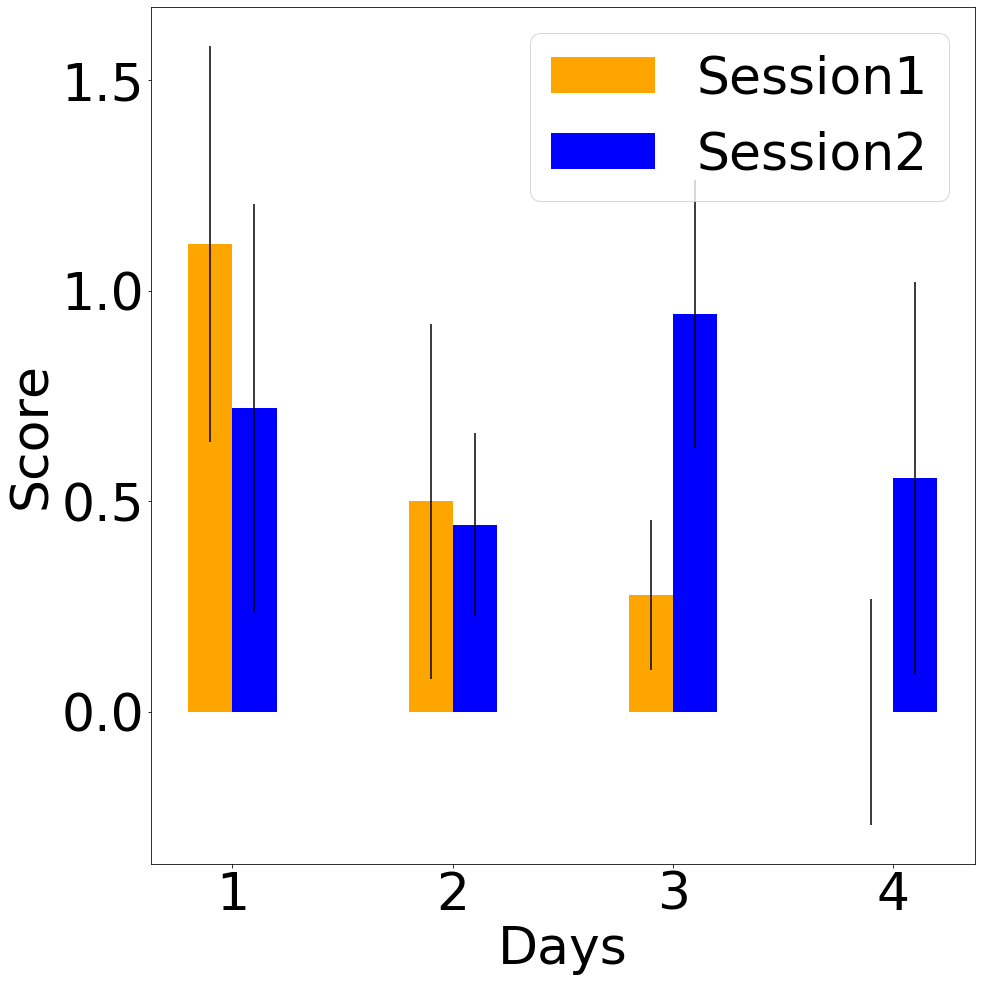

In [17]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueDifference'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
#ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDifference_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

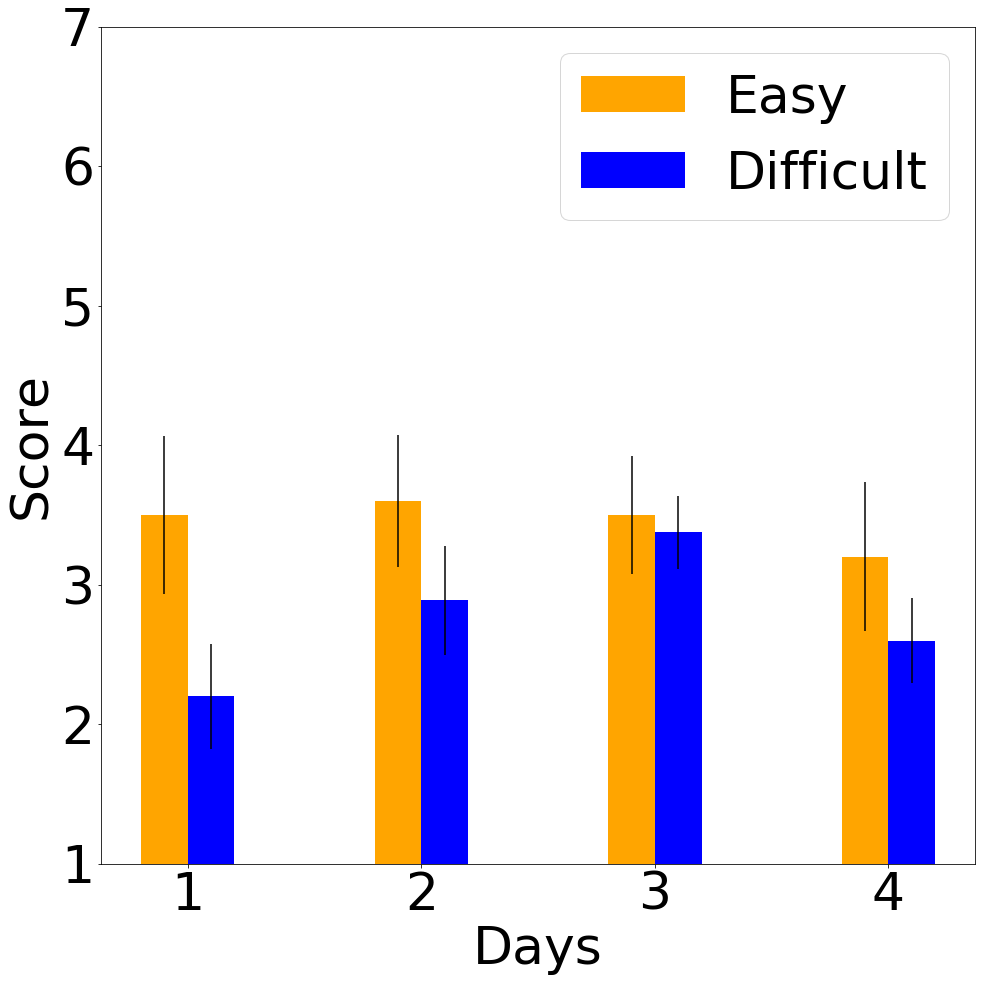

In [8]:
PlotTitle = 'FatigueBefore'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueBefore'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==2)].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==2)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day), df1.Session==2)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==1)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==1)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day), df1.Session==1)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueBefore_blocks_easySession2.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Fatigue for each subject

ac 0
4    0
5    0
Name: FatigueDifference, dtype: int64
ac 1
0    1
1    1
Name: FatigueDifference, dtype: int64
ac 2
2   -1
3    0
Name: FatigueDifference, dtype: int64
ac 3
6    0
7    0
Name: FatigueDifference, dtype: int64
ac 4
8    0
9    0
Name: FatigueDifference, dtype: int64
af 0
14    1
15    0
Name: FatigueDifference, dtype: int64
af 1
10    5
11   -3
Name: FatigueDifference, dtype: int64
af 2
12   -1
13    3
Name: FatigueDifference, dtype: int64
af 3
16    0
17    0
Name: FatigueDifference, dtype: int64
af 4
18    0
19    2
Name: FatigueDifference, dtype: int64
aq 0
28    1
29    1
Name: FatigueDifference, dtype: int64
aq 1
20   -1
21    1
Name: FatigueDifference, dtype: int64
aq 2
22    0
23    0
Name: FatigueDifference, dtype: int64
aq 3
24    1
25   -1
Name: FatigueDifference, dtype: int64
aq 4
26    0
27    2
Name: FatigueDifference, dtype: int64
bh1 0
32    0
33   -1
Name: FatigueDifference, dtype: int64
bh1 1
30    0
31    3
Name: FatigueDifference, dtype: int64
bh1 2

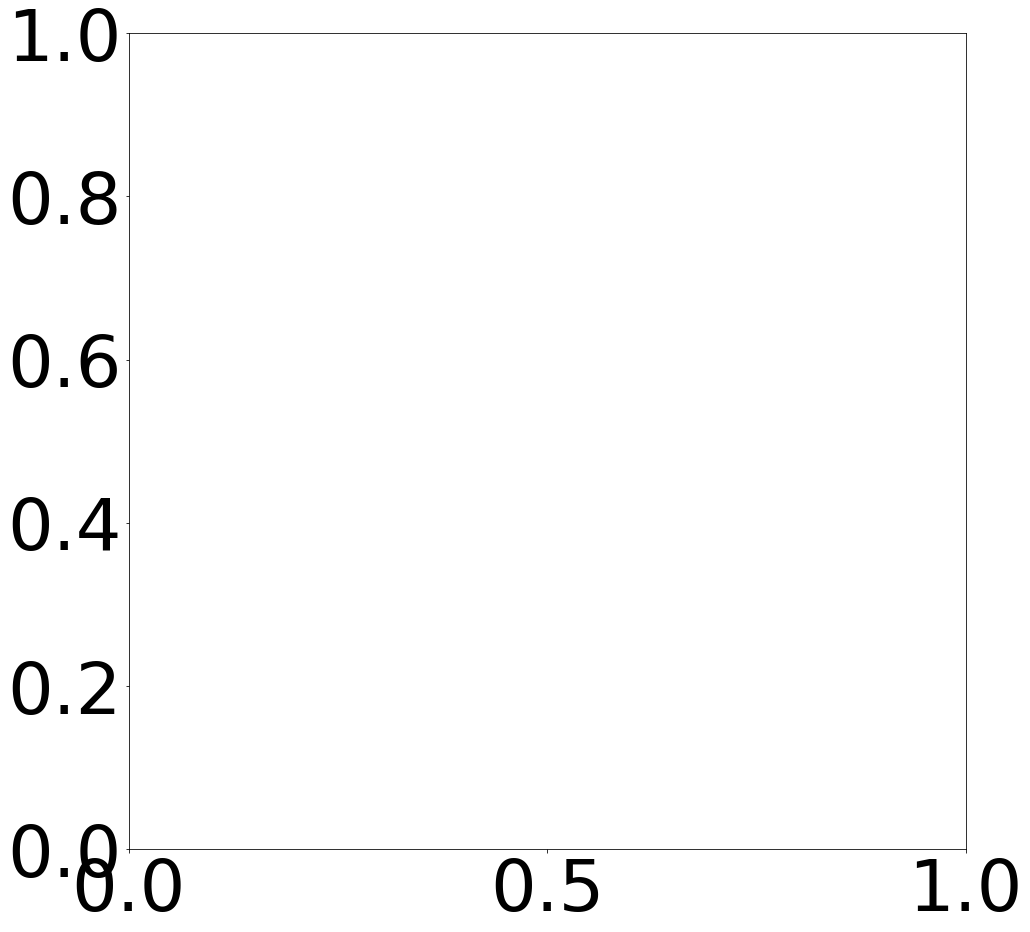

In [9]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDifference']



label_fontSize = 72
others_fontSize = 62


#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()



for i_subj, subj in enumerate(np.unique(df1.Subject)): 
    
    for i_day, day in enumerate(np.unique(df1.DayDT)):
        print(subj, day)
        print(df1.FatigueDifference[np.logical_and(df1.Subject==subj, df1.DayDT==day)])
    
    
    """
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([-0.2, 2])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\fatigueDifference.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))
"""


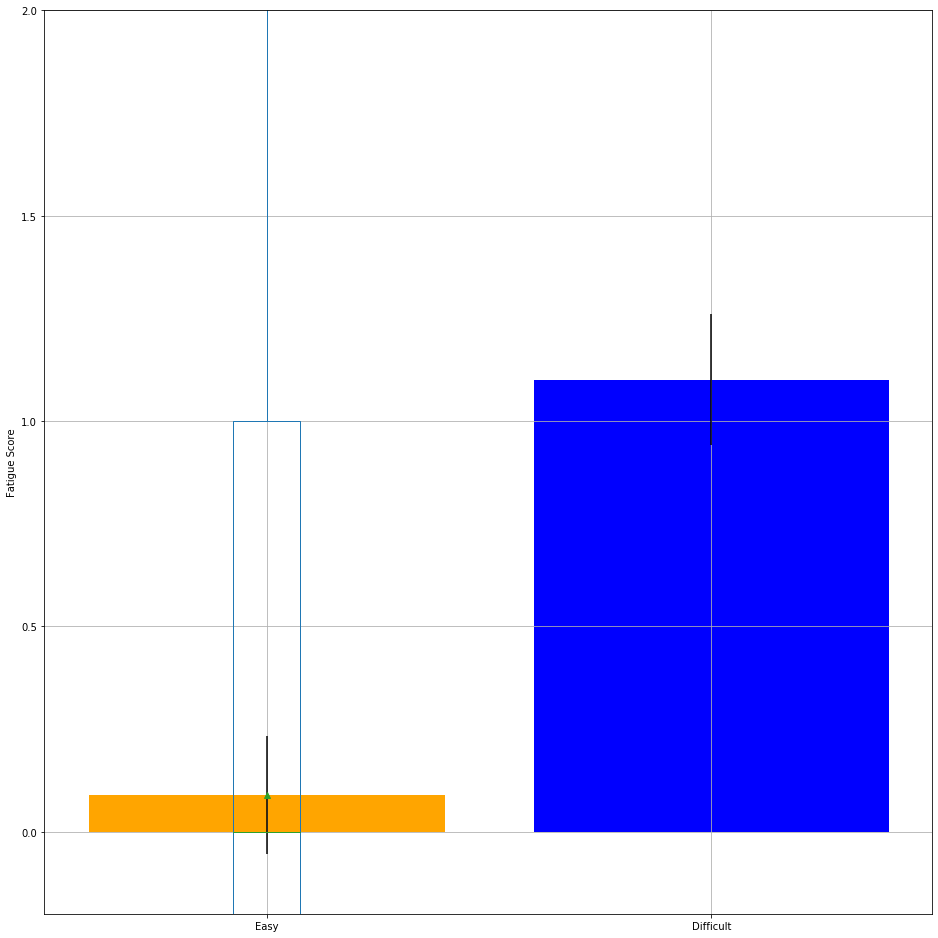

In [4]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDifference']



label_fontSize = 72
others_fontSize = 62

boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([-0.2, 2])
ax1.set_ylabel('Fatigue Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\fatigueDifference.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

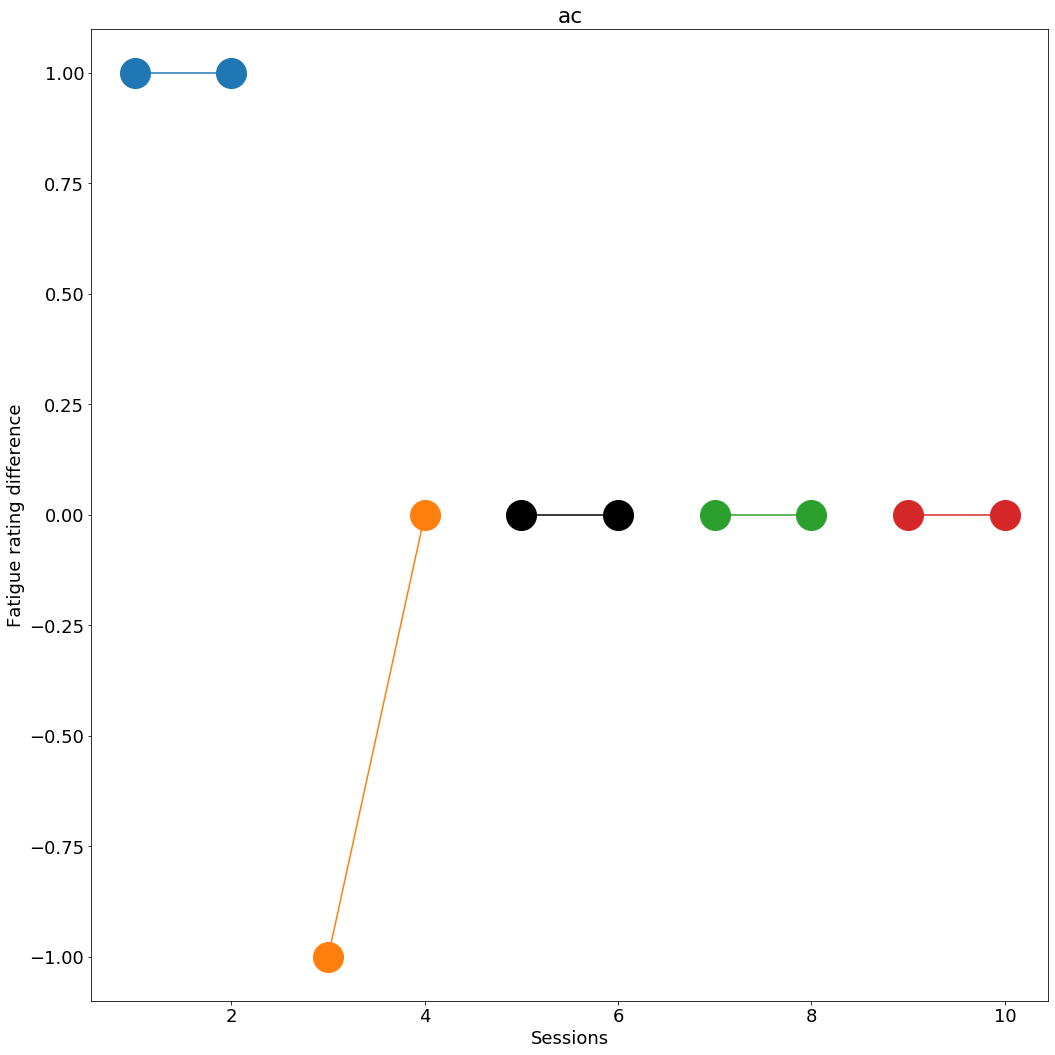

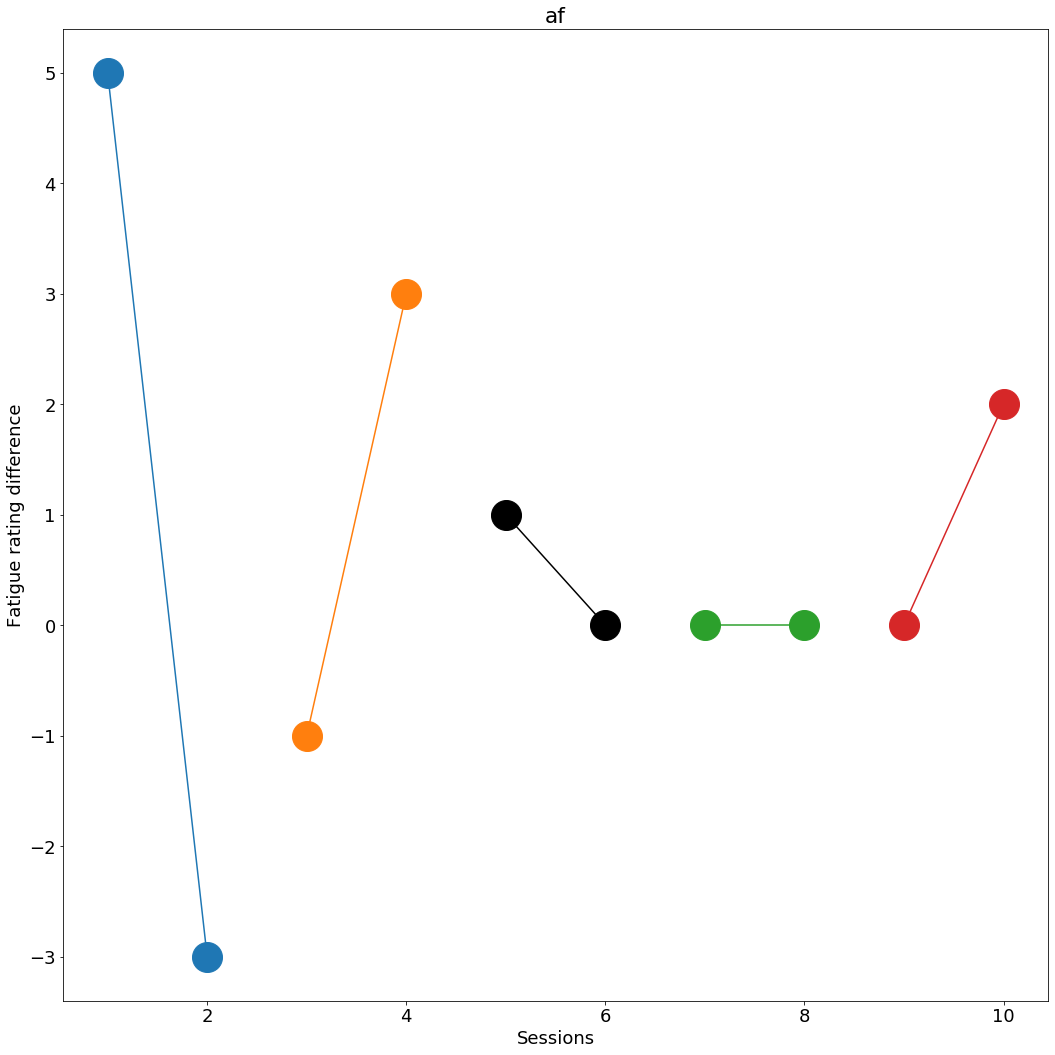

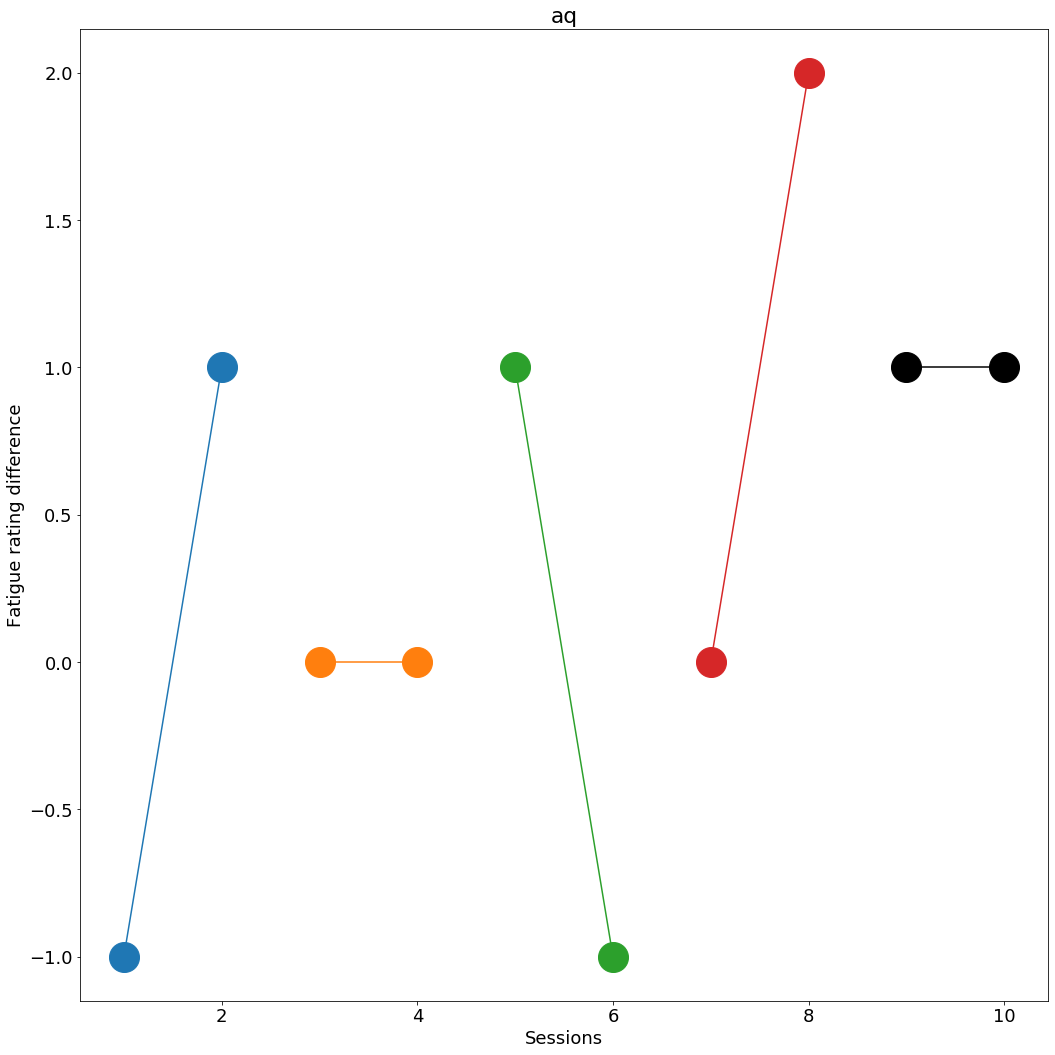

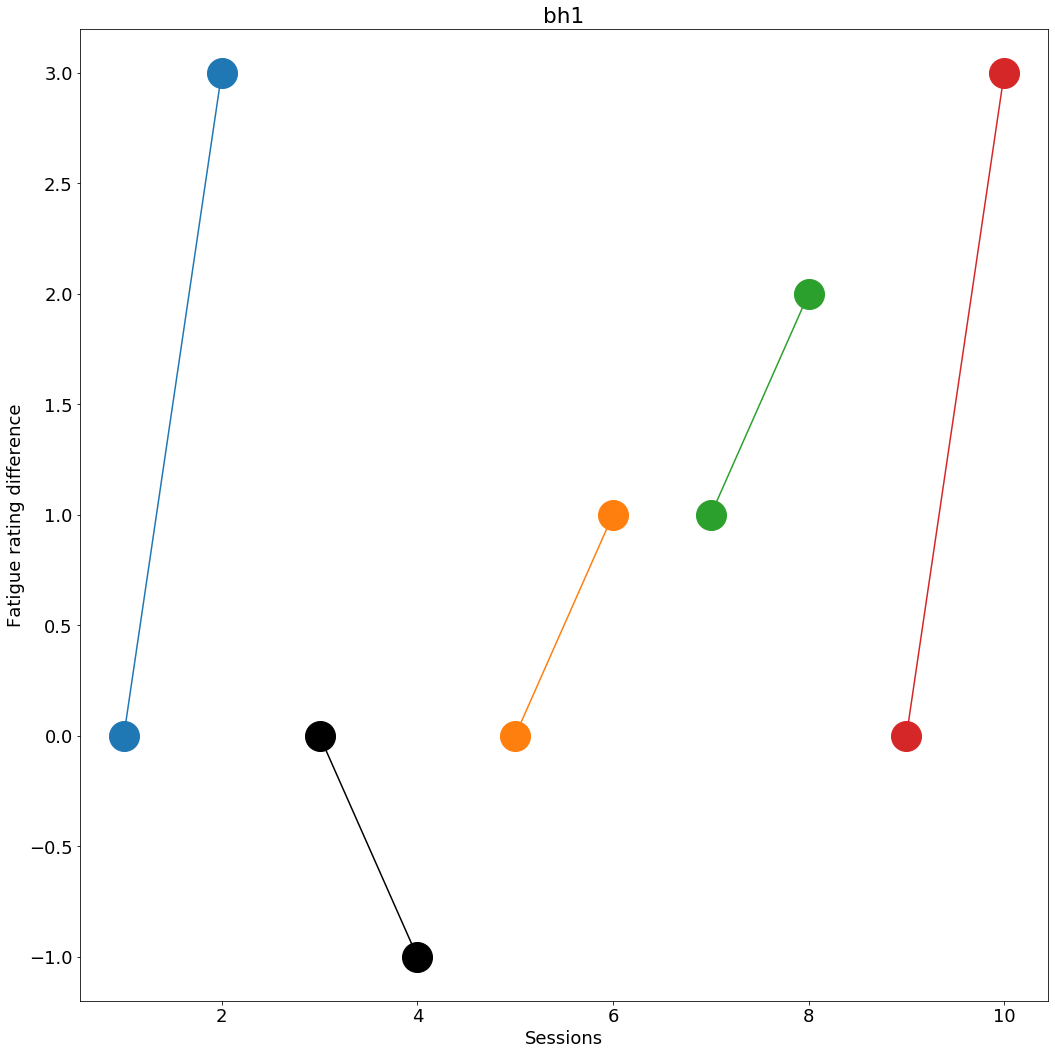

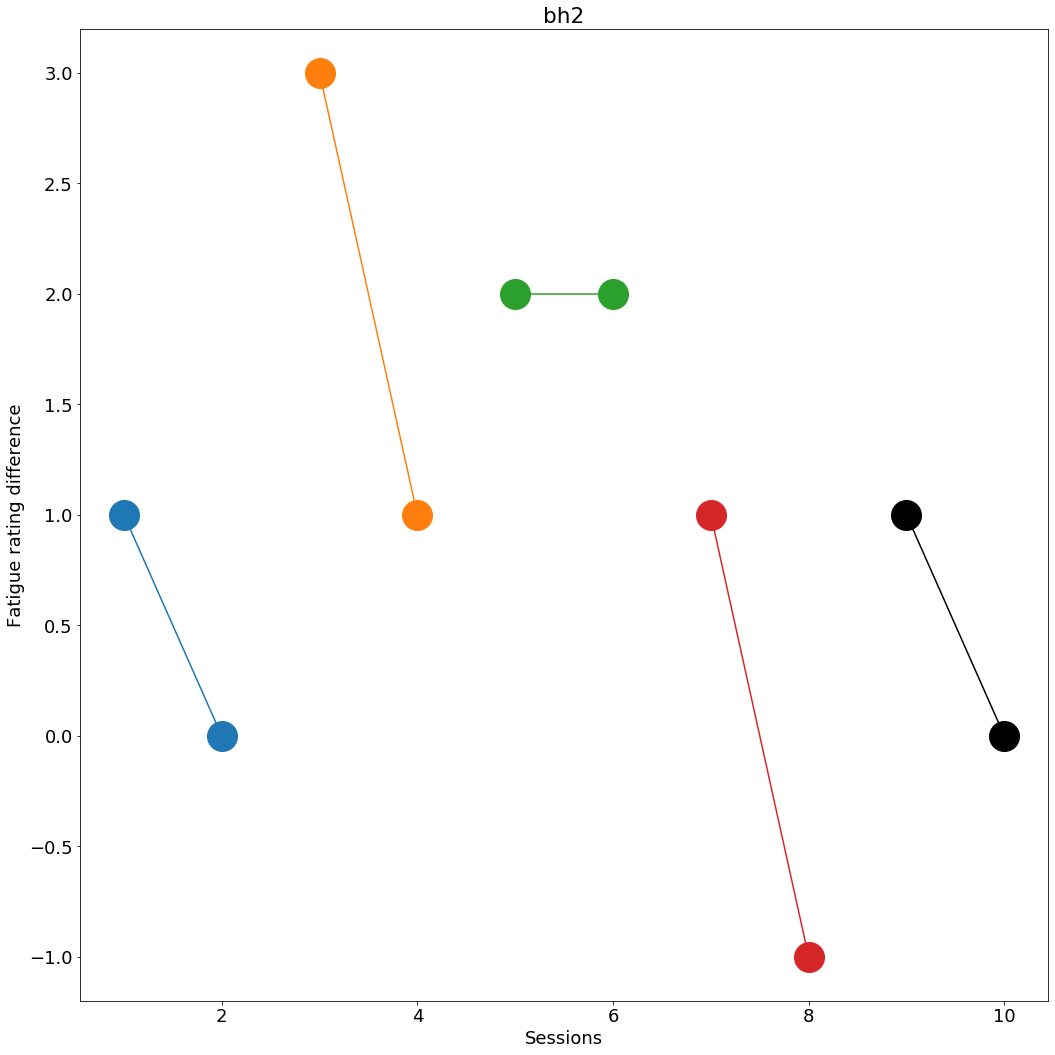

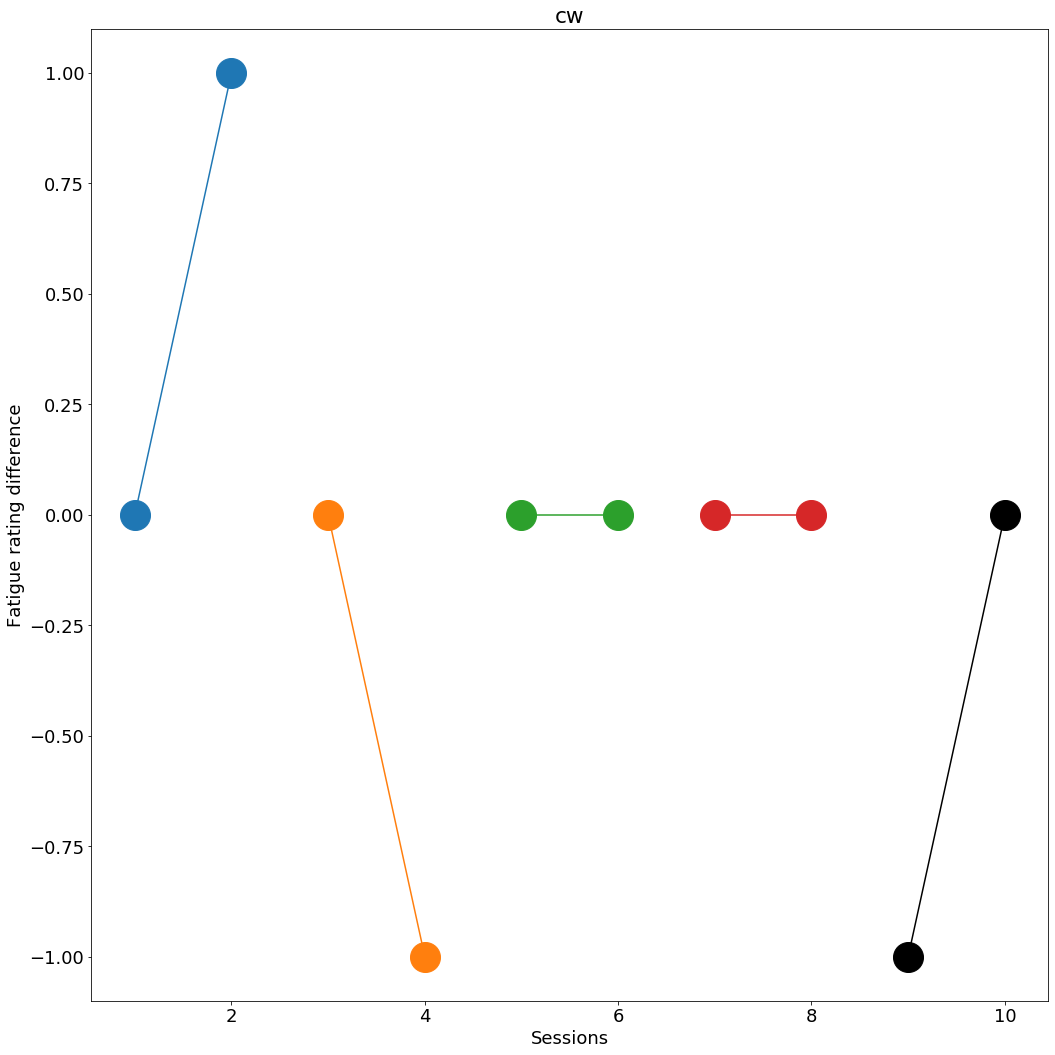

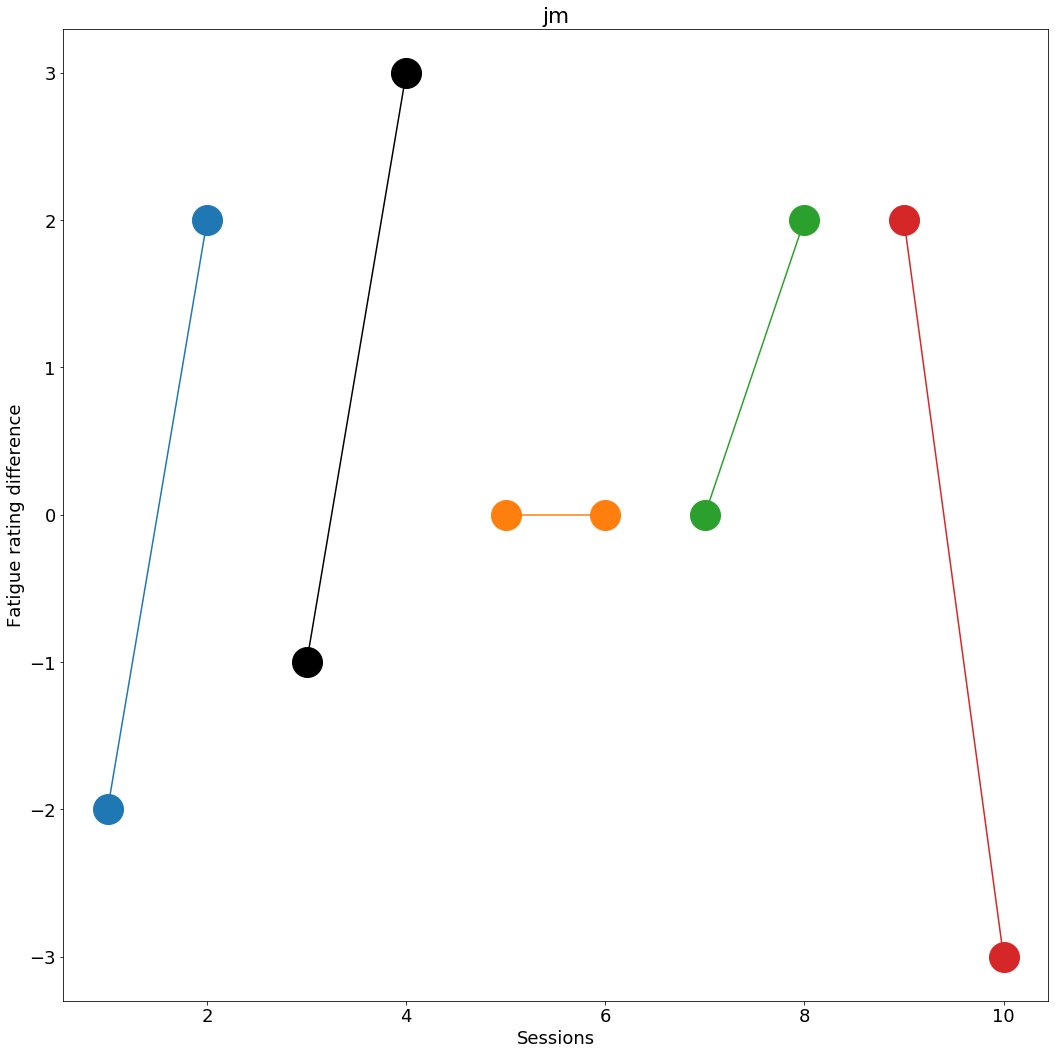

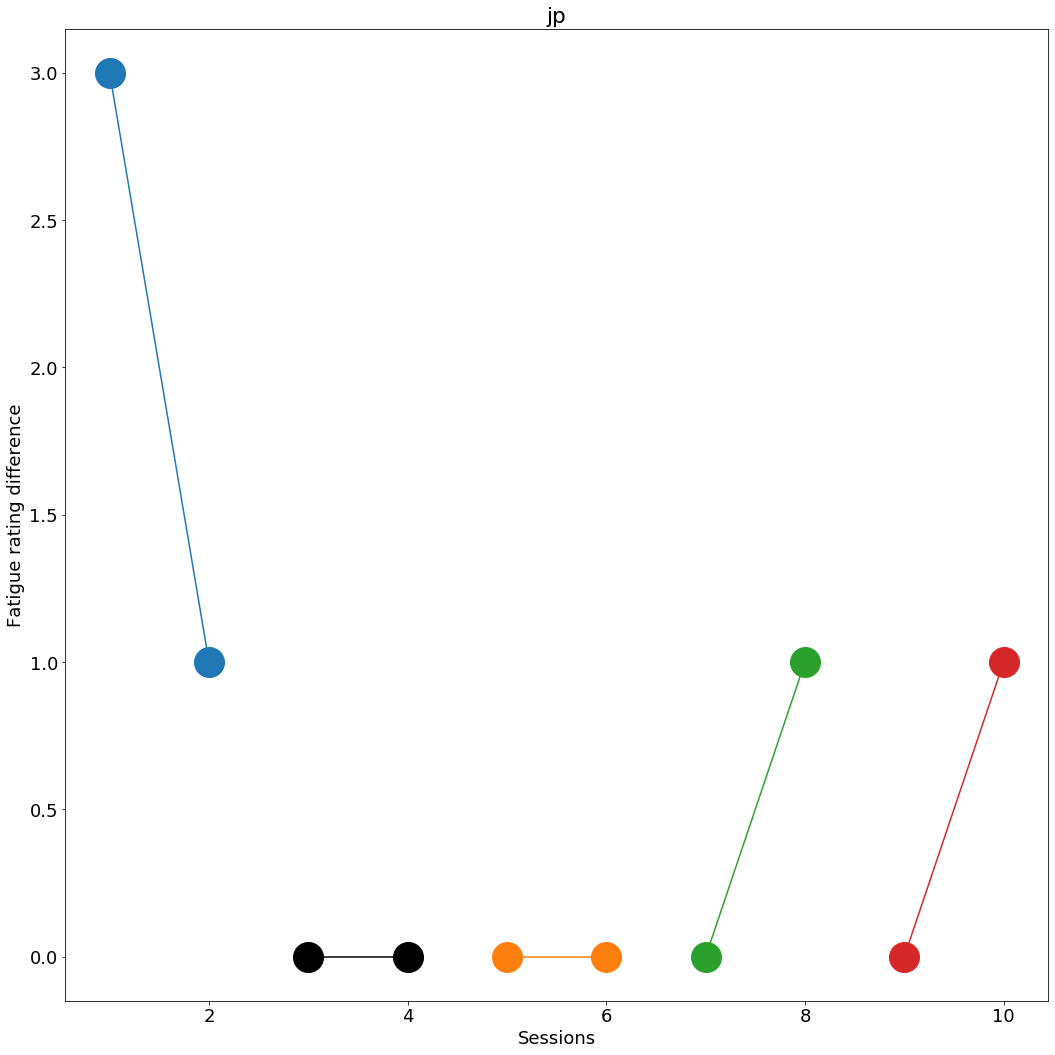

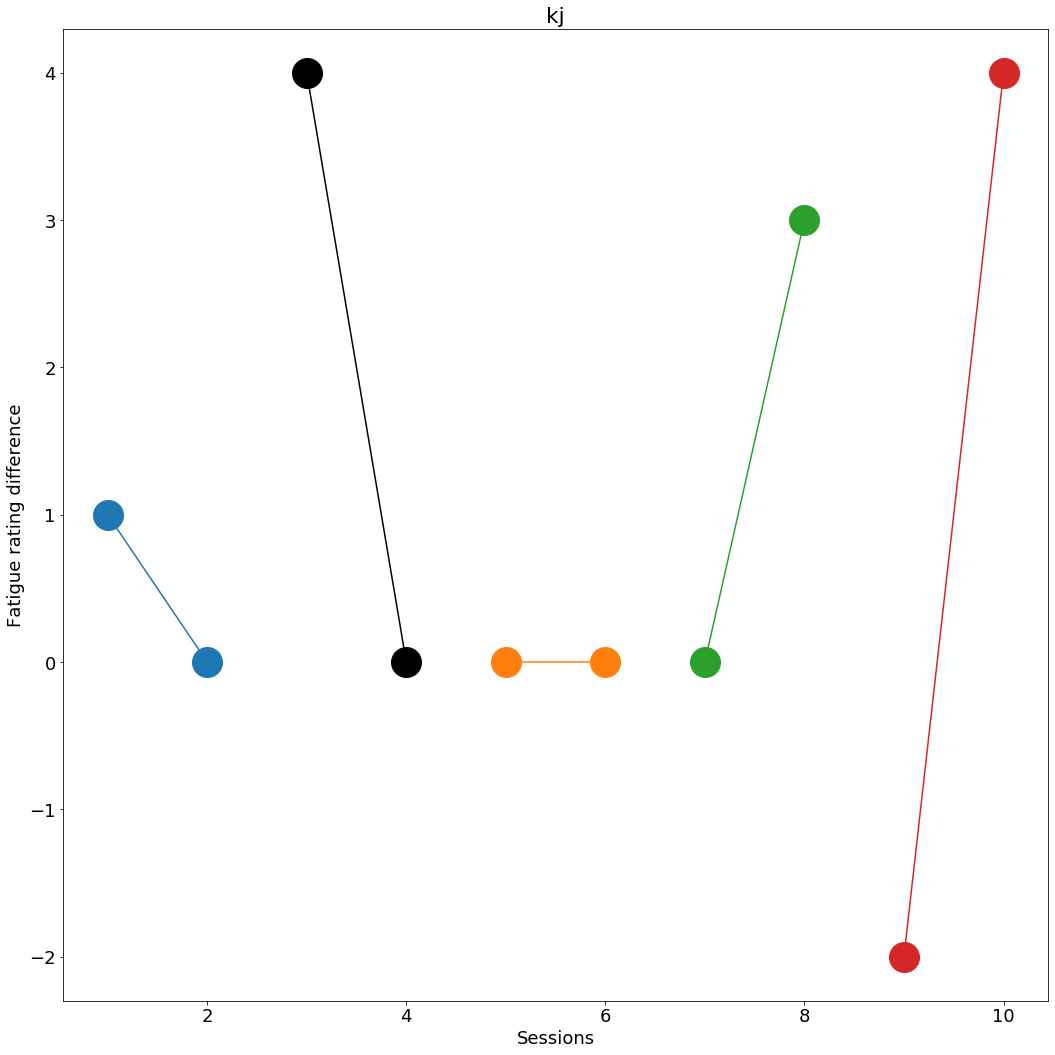

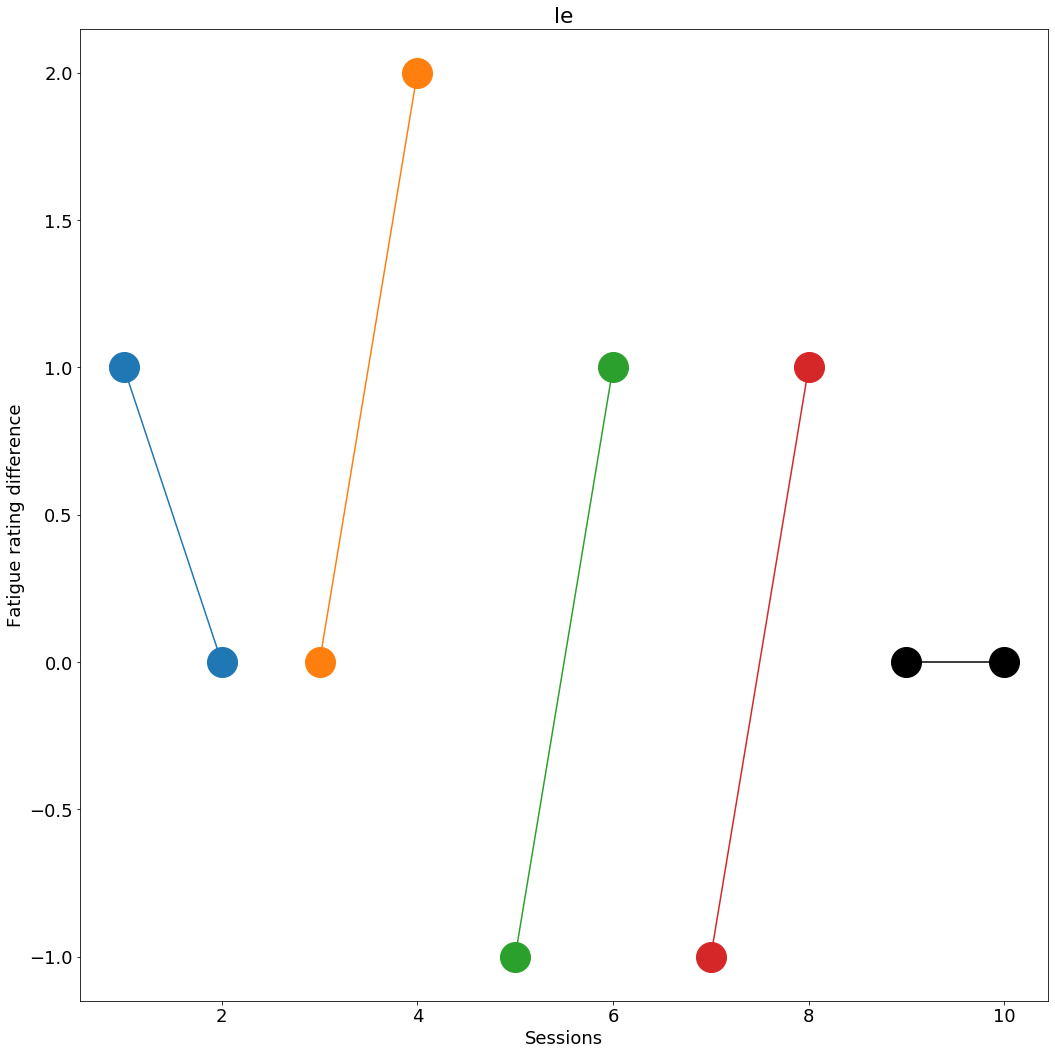

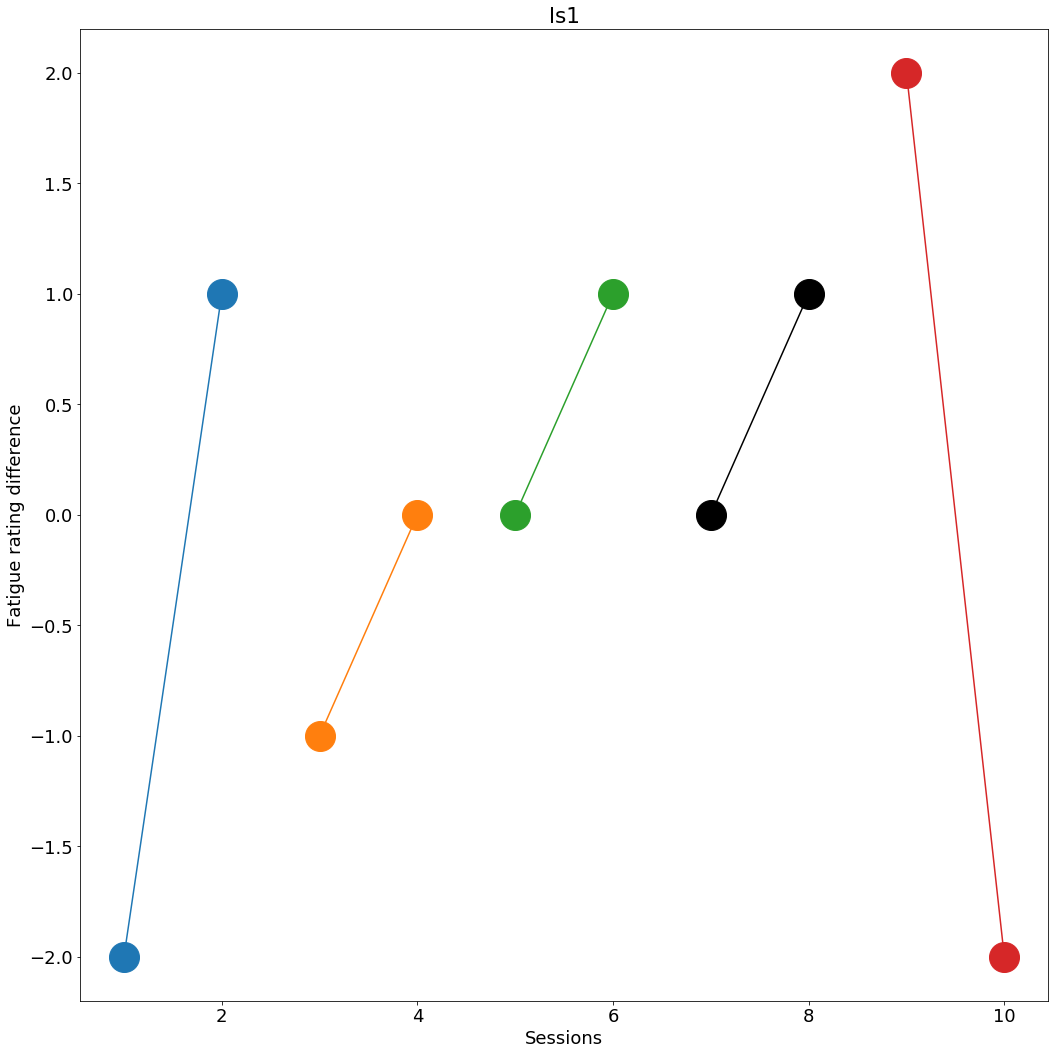

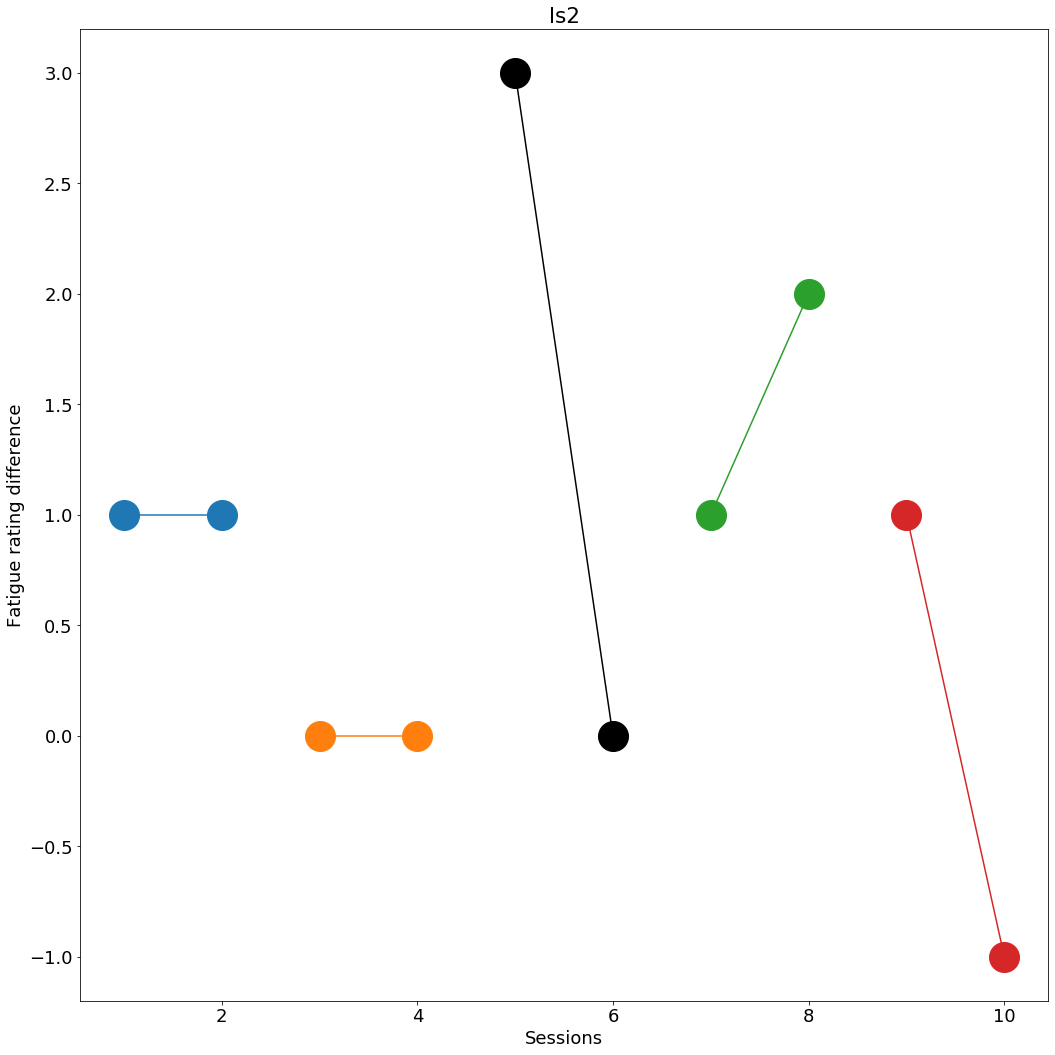

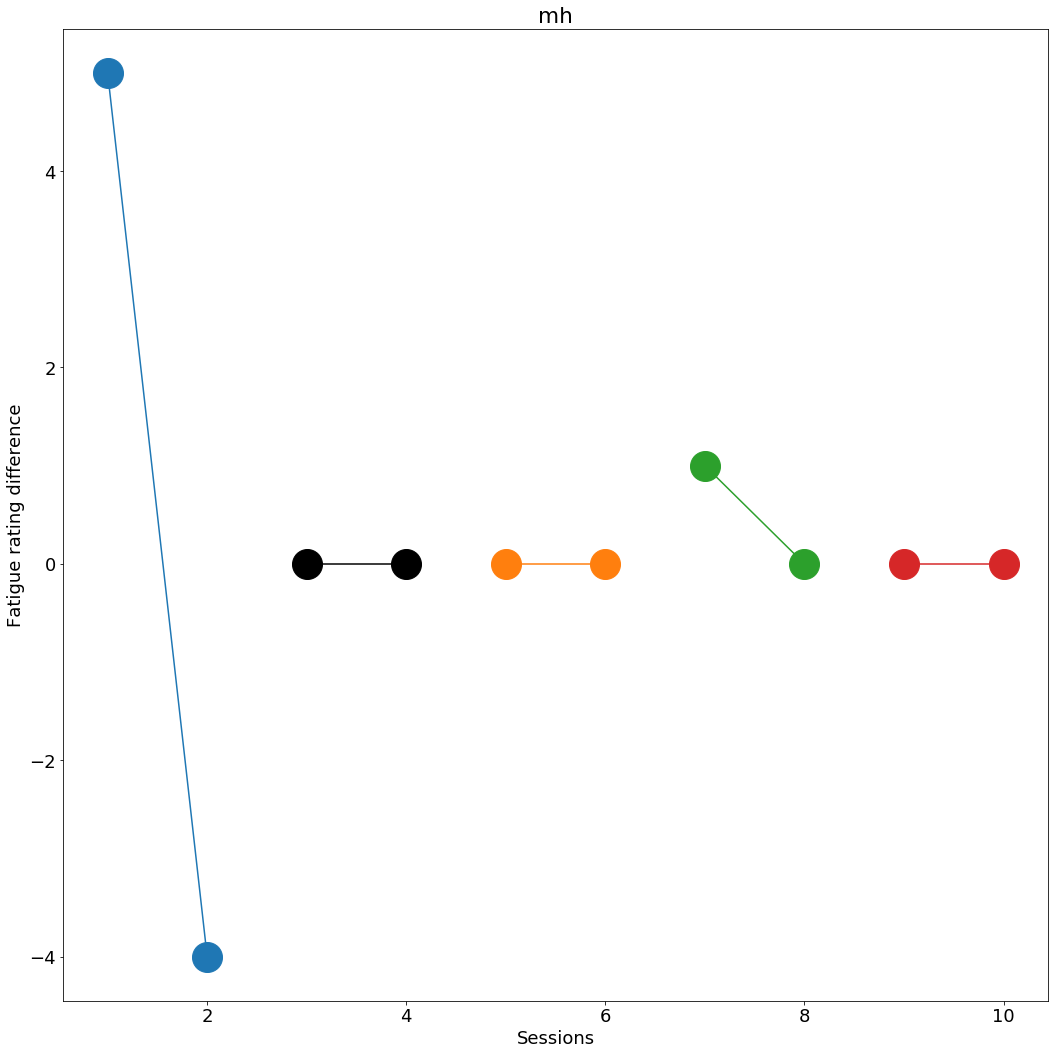

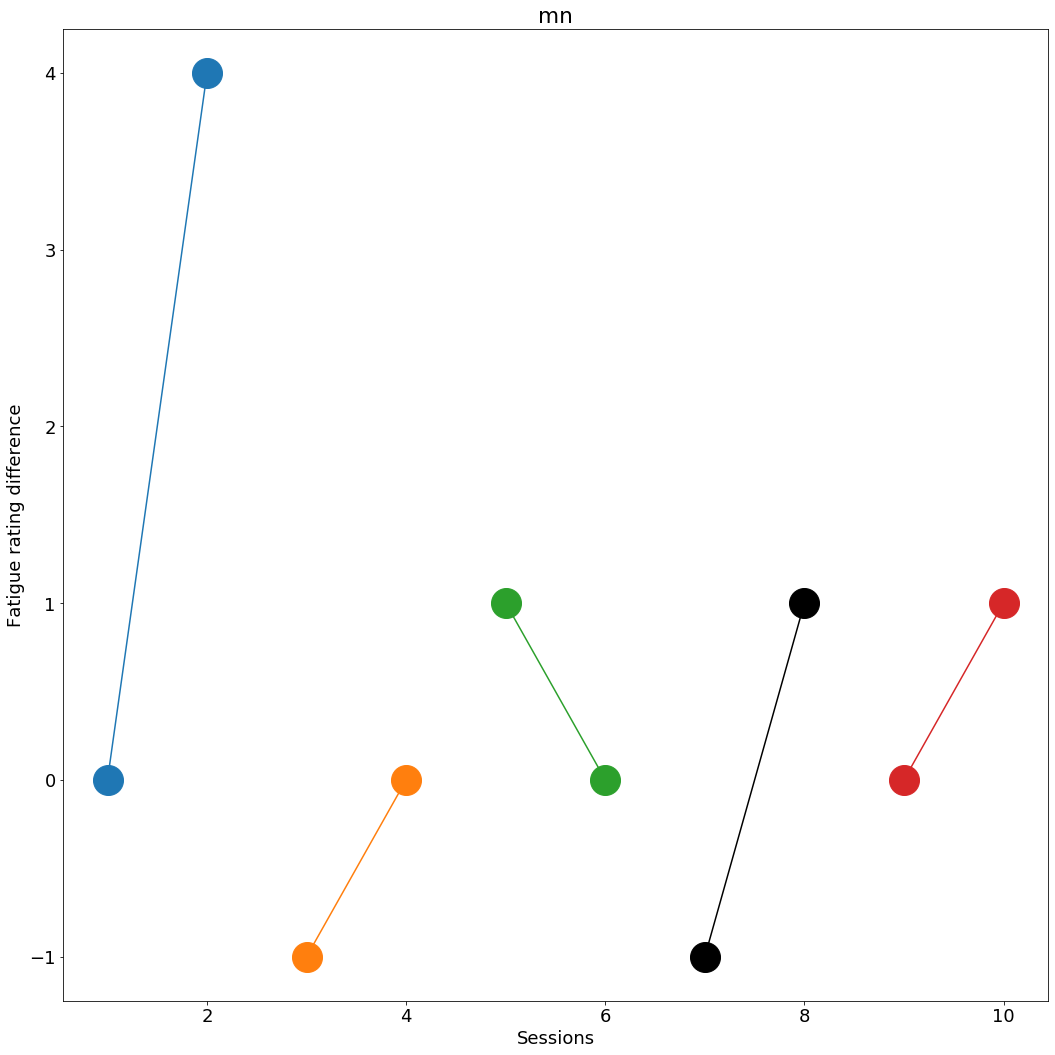

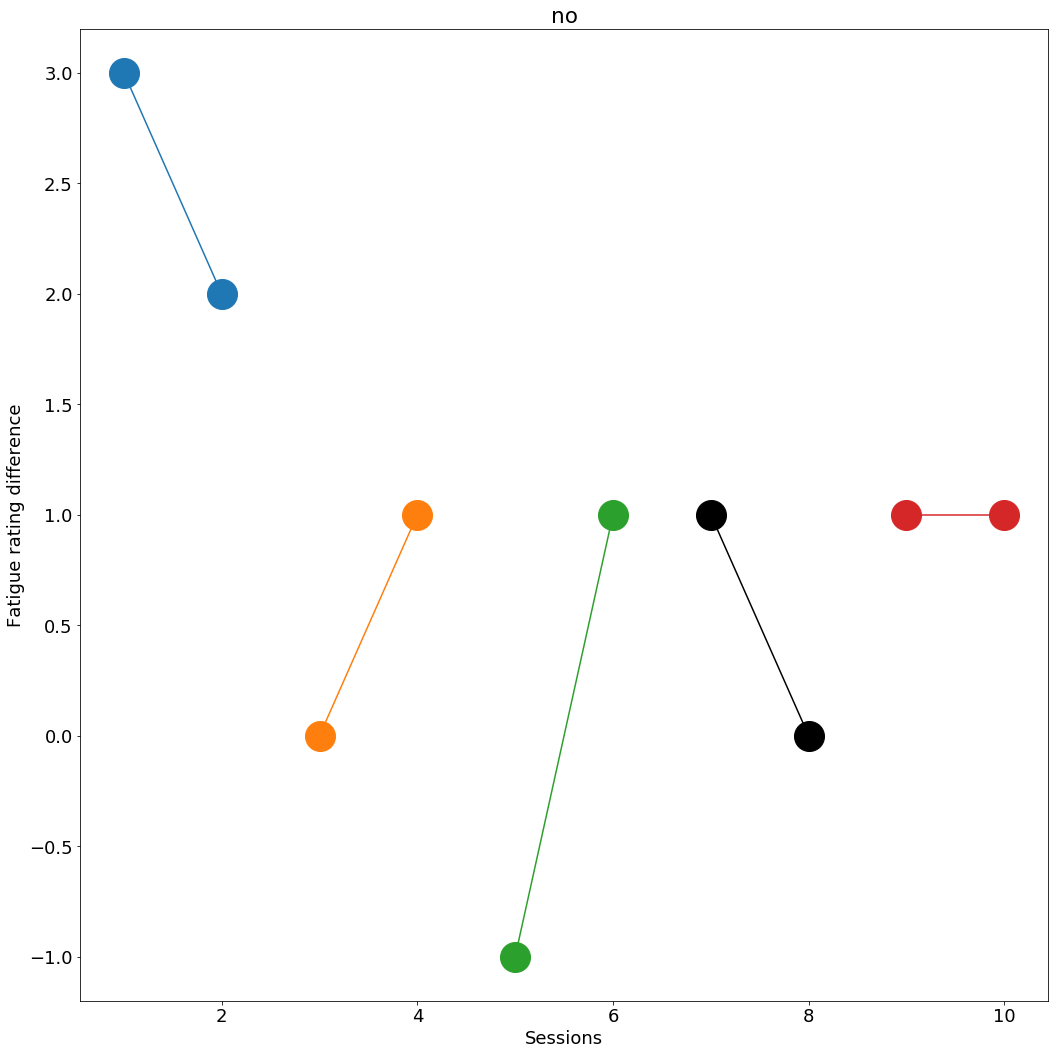

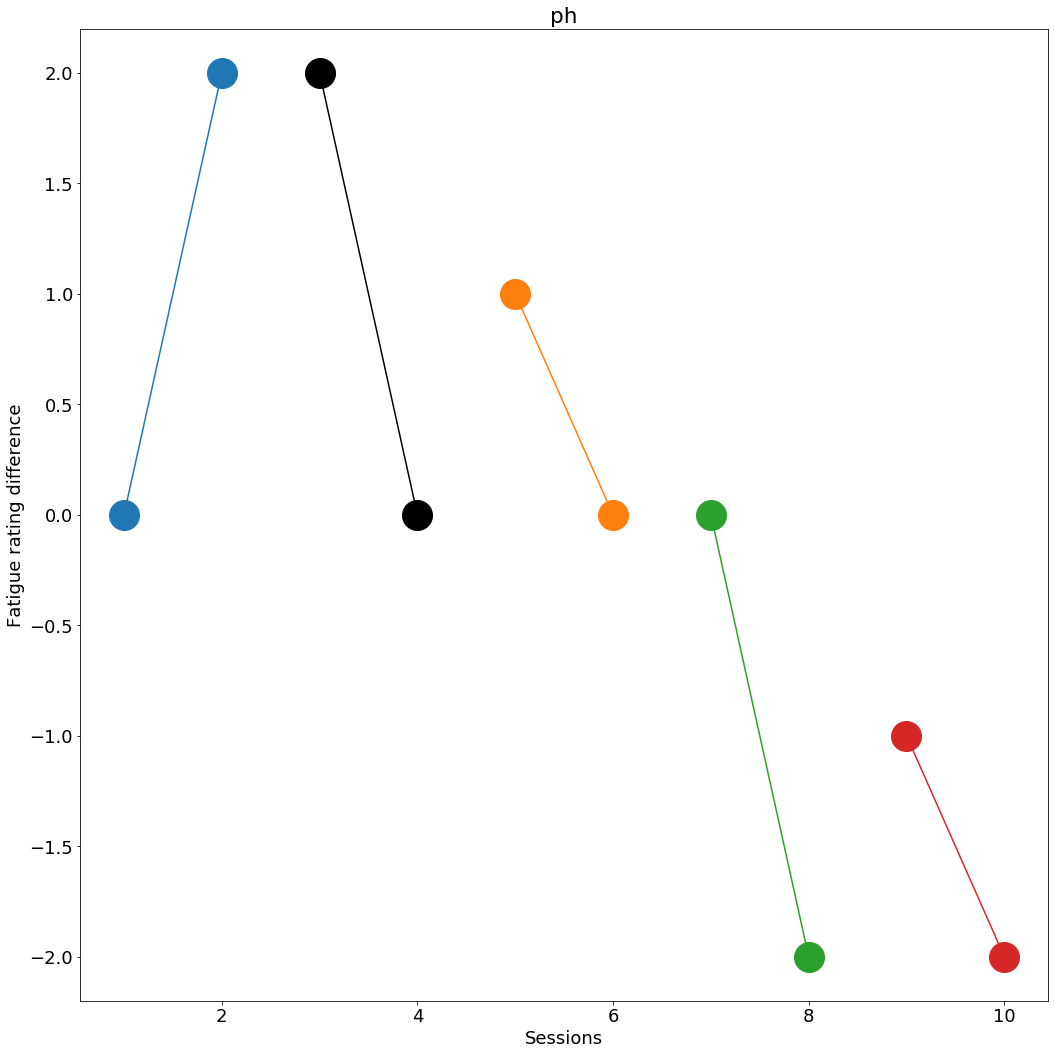

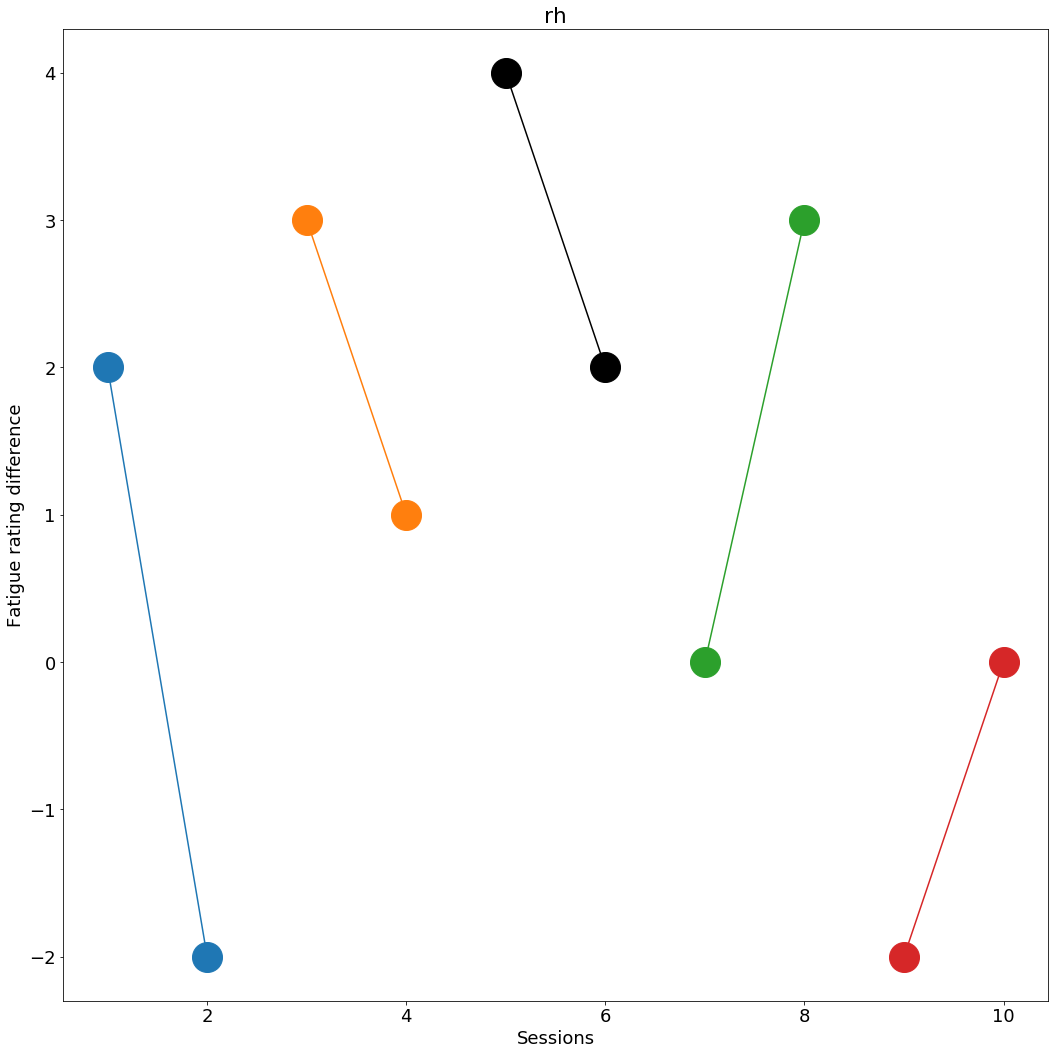

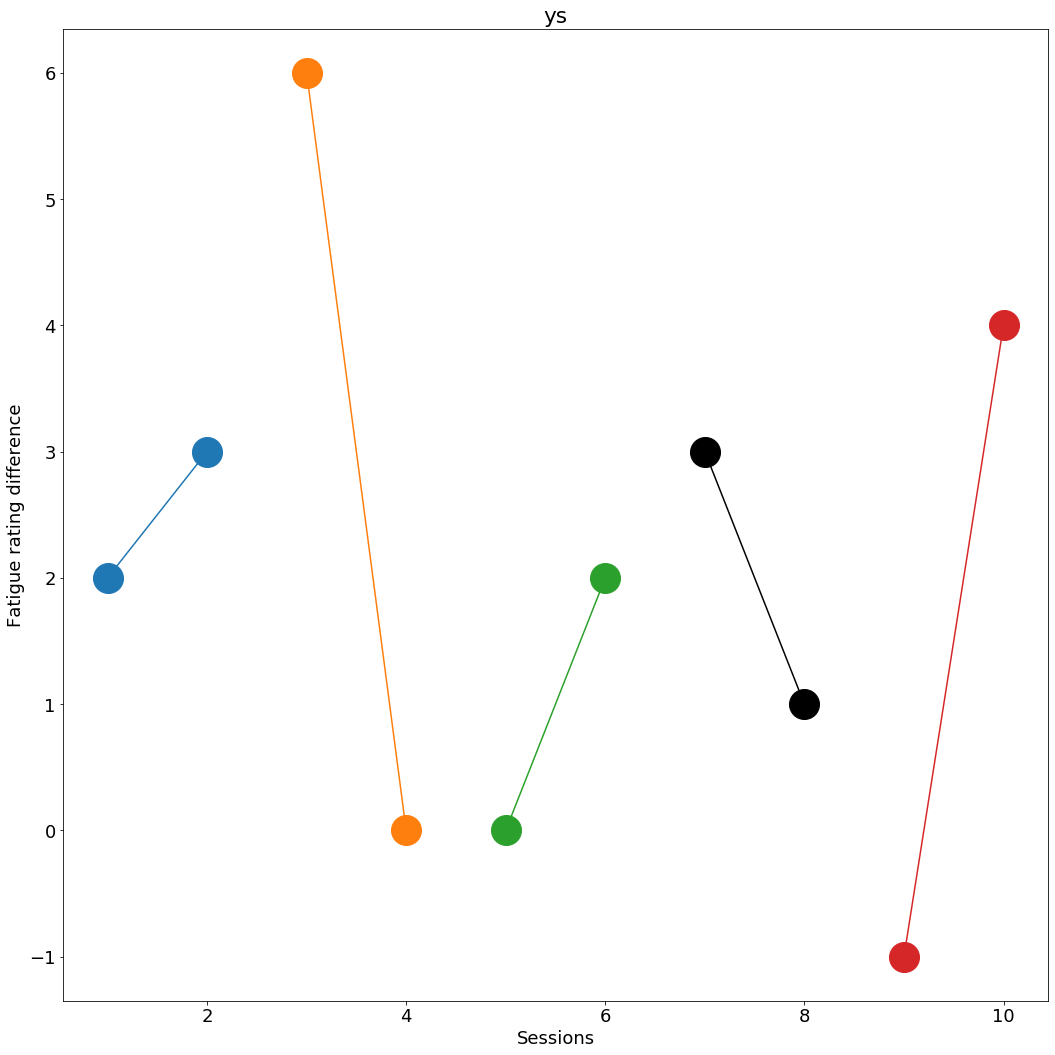

In [43]:

variable = 'FatigueDifference'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12



subjectlist = ['ac', 'af', 'aq', 'bh1', 'bh2', 'cw', 'jm', 'jp', 'kj', 'le', 'ls1', 'ls2', 'mh', 'mn', 'no', 'ph', 'rh', \
               'ys'] 

list1 = list()
x_list1 = list()

for subject in subjectlist:
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    for ind, day in enumerate(np.unique(df1.DayDT)):
        #print(ind, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), \
                                            #df1.DayDT==day)])
        
        if day==0:
            xAxis = [int(df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0][0])*2-1, \
                 int(df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0][0])*2]
            
            p1 = ax1.plot(xAxis, df1[variable][np.logical_and(df1.Subject==subject, df1.DayDT==day)], marker = 'o', ms=30, color = \
                      'black')
            continue
            
        xAxis = [df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0]*2-1, \
                 df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0]*2]
        
        p1 = ax1.plot(xAxis, df1[variable][np.logical_and(df1.Subject==subject, df1.DayDT==day)], marker = 'o', ms=30)
    
    
    
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.set_title(subject)
    ax1.set_ylabel('Fatigue rating difference')
    ax1.set_xlabel('Sessions')
    
    plt.tight_layout()
    fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDifference_' + subject + '.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

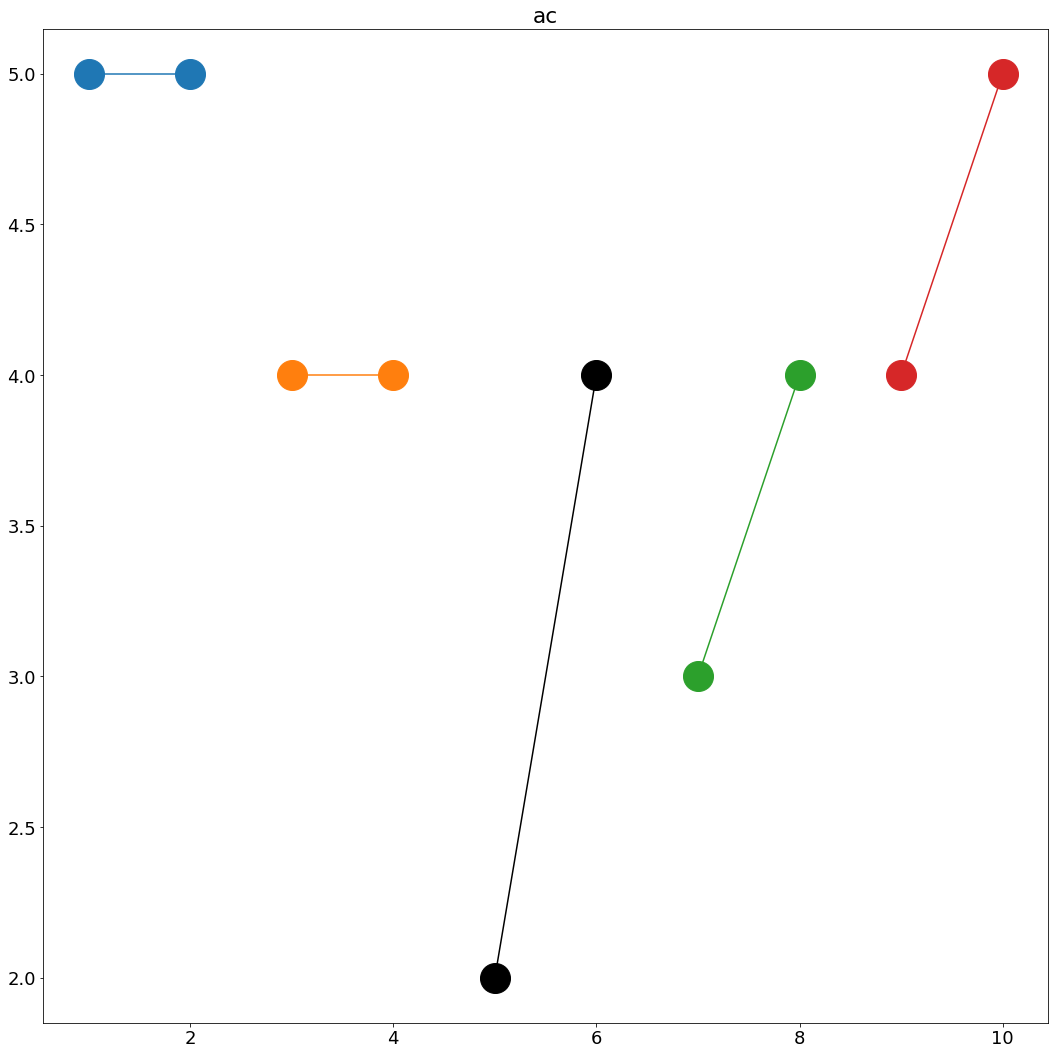

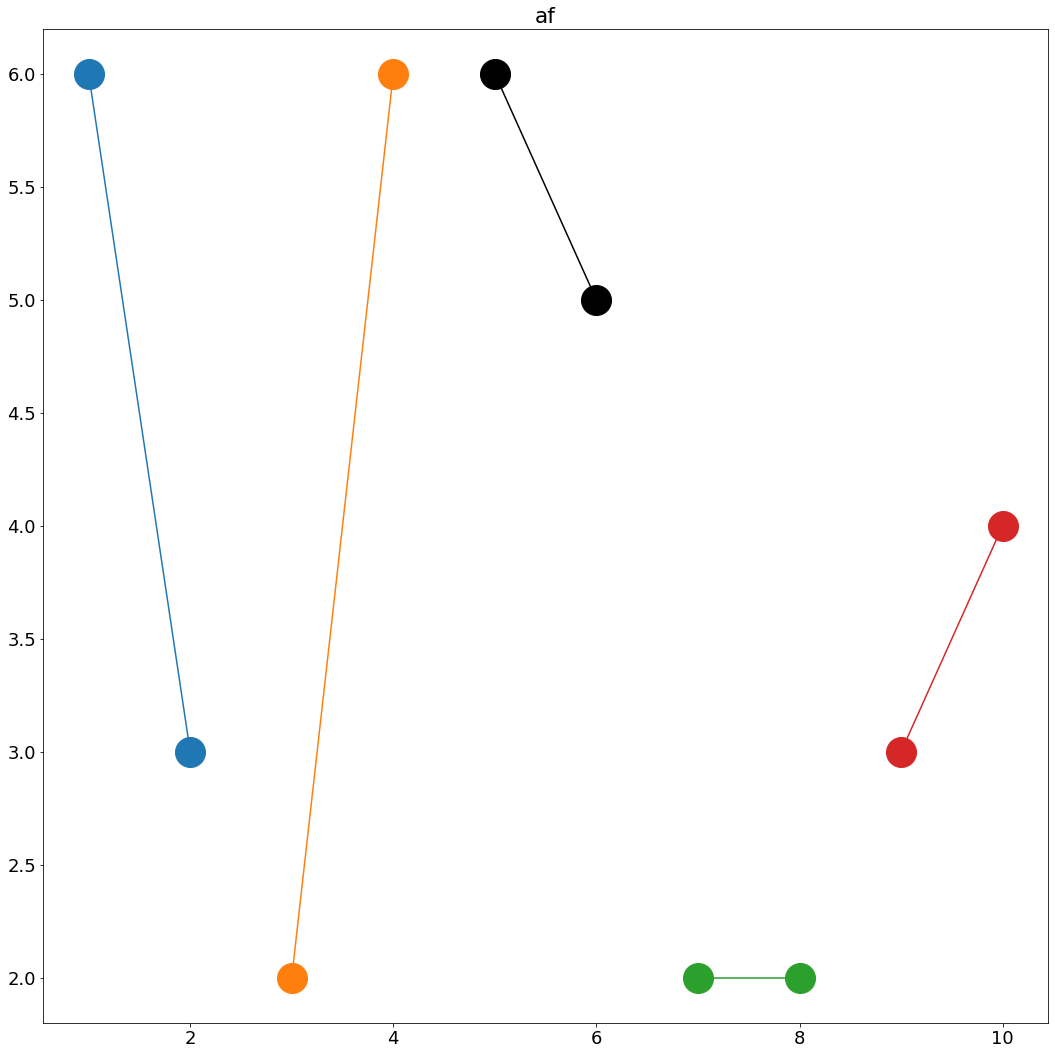

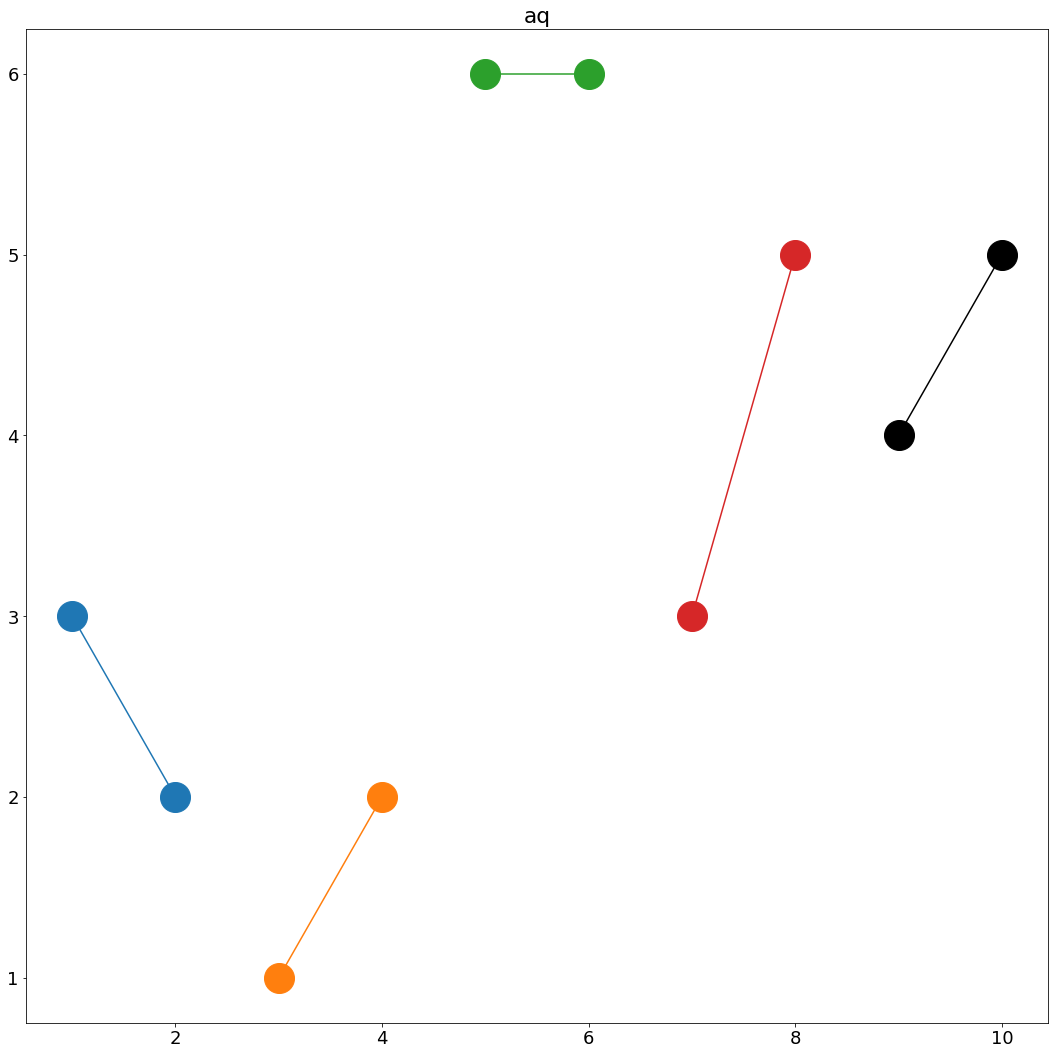

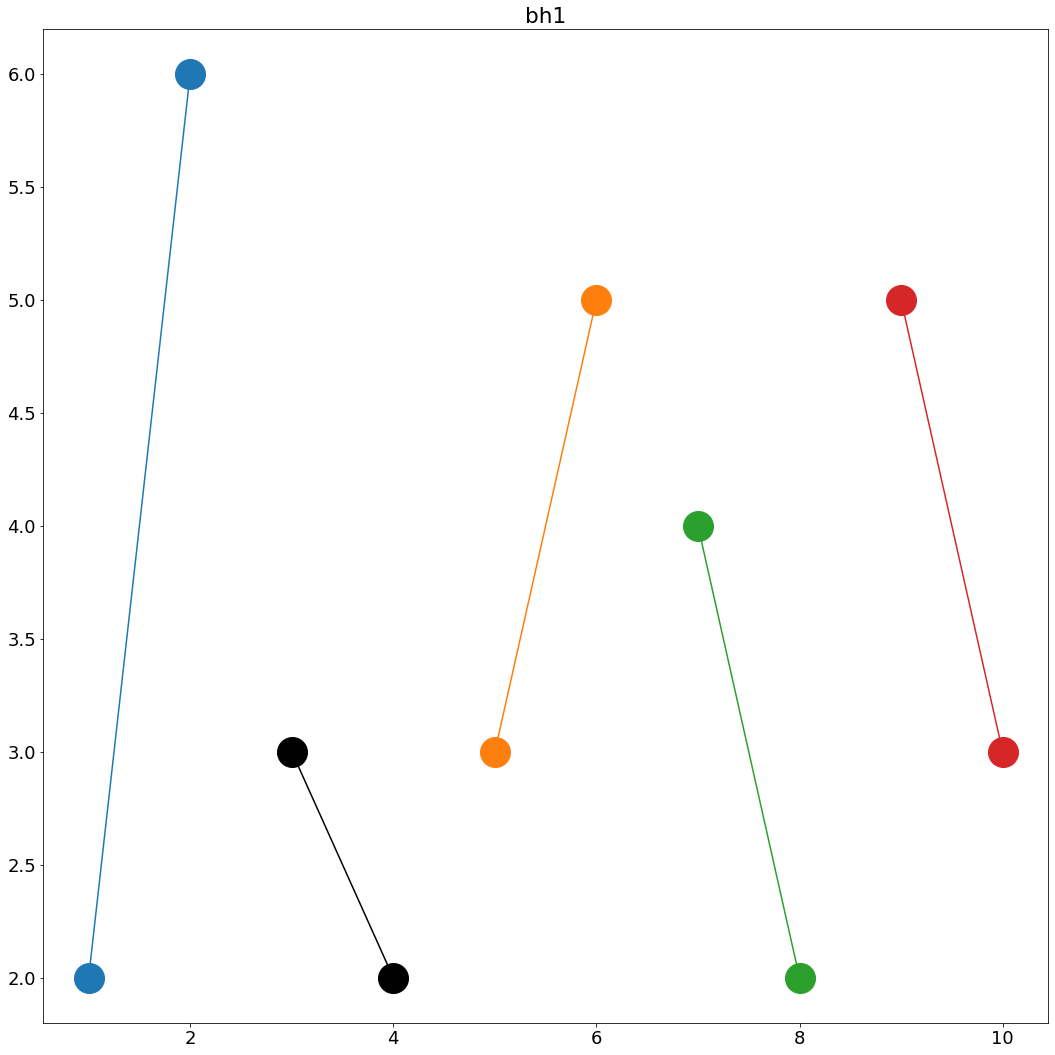

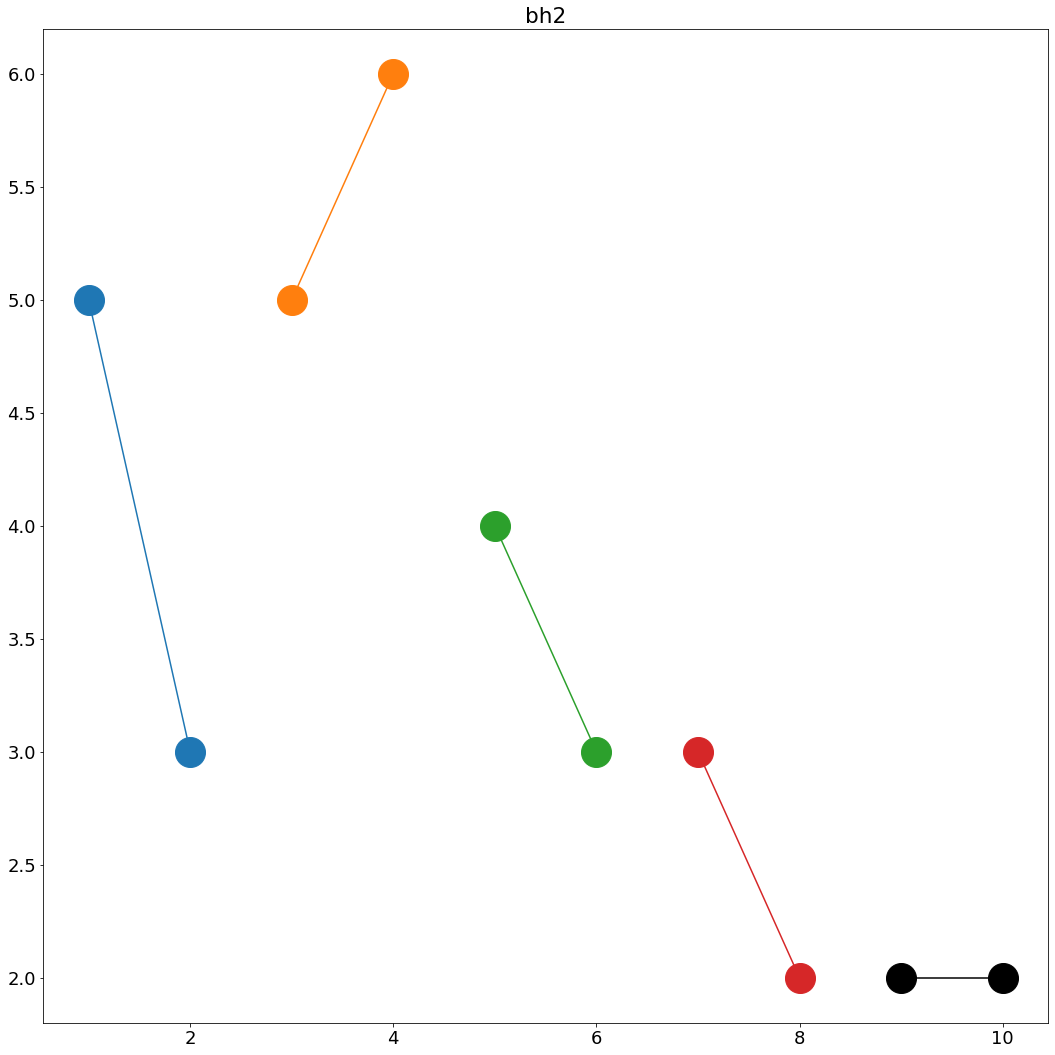

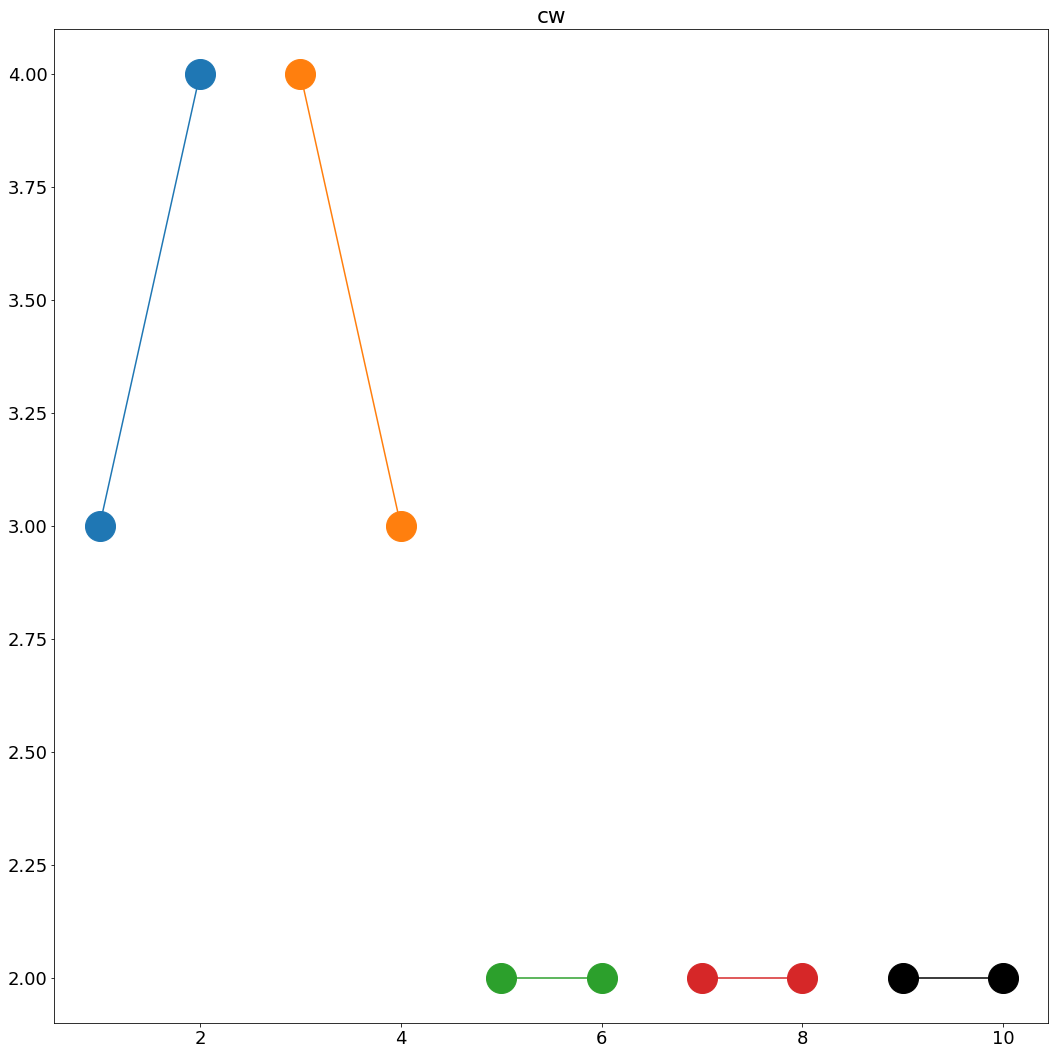

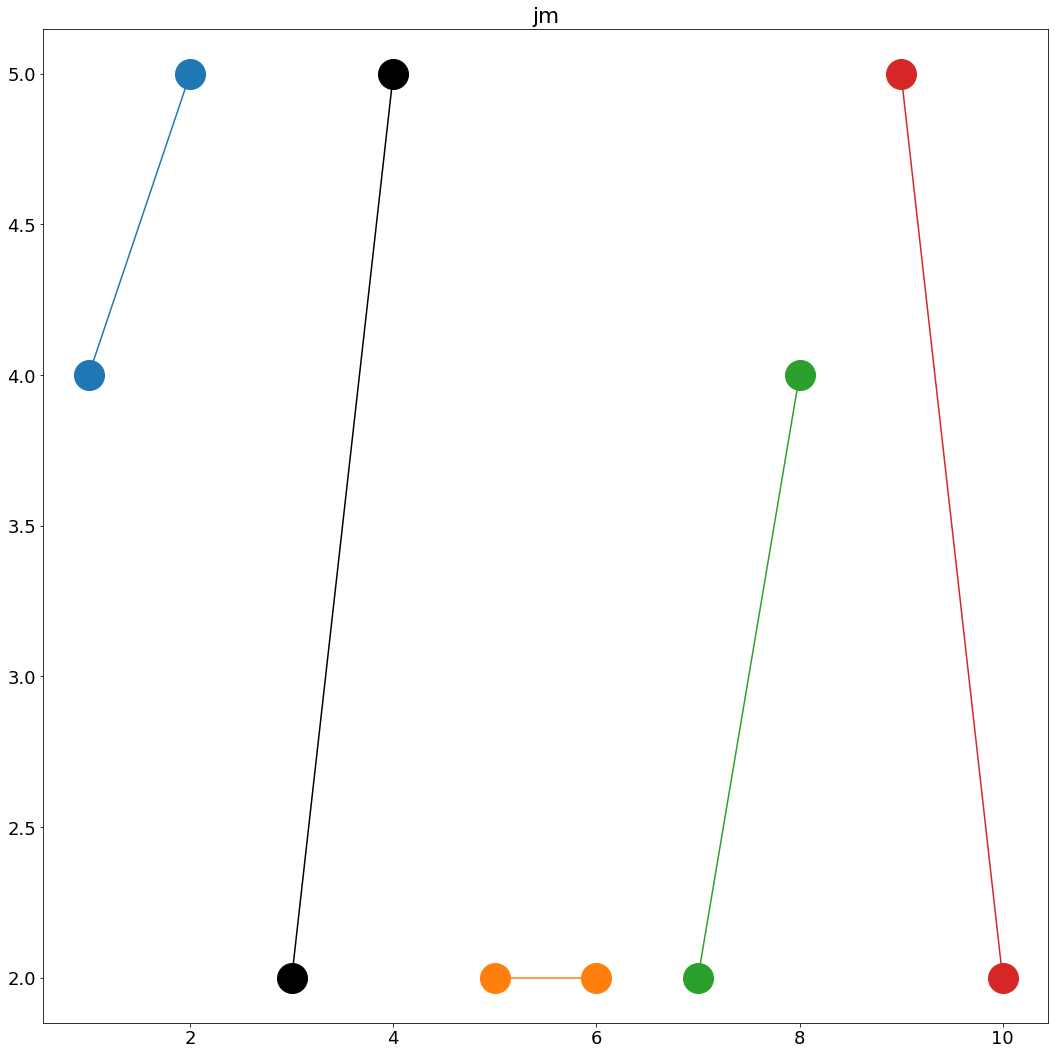

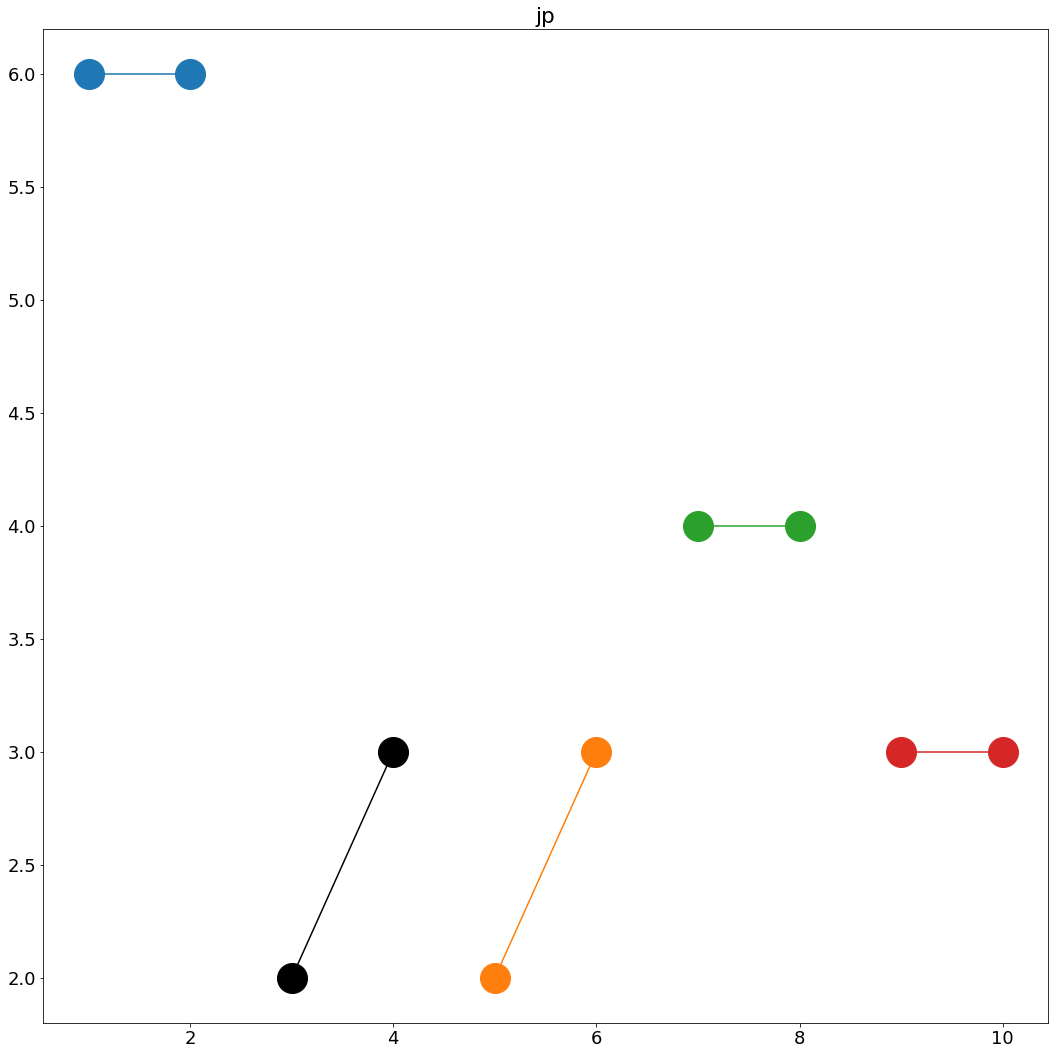

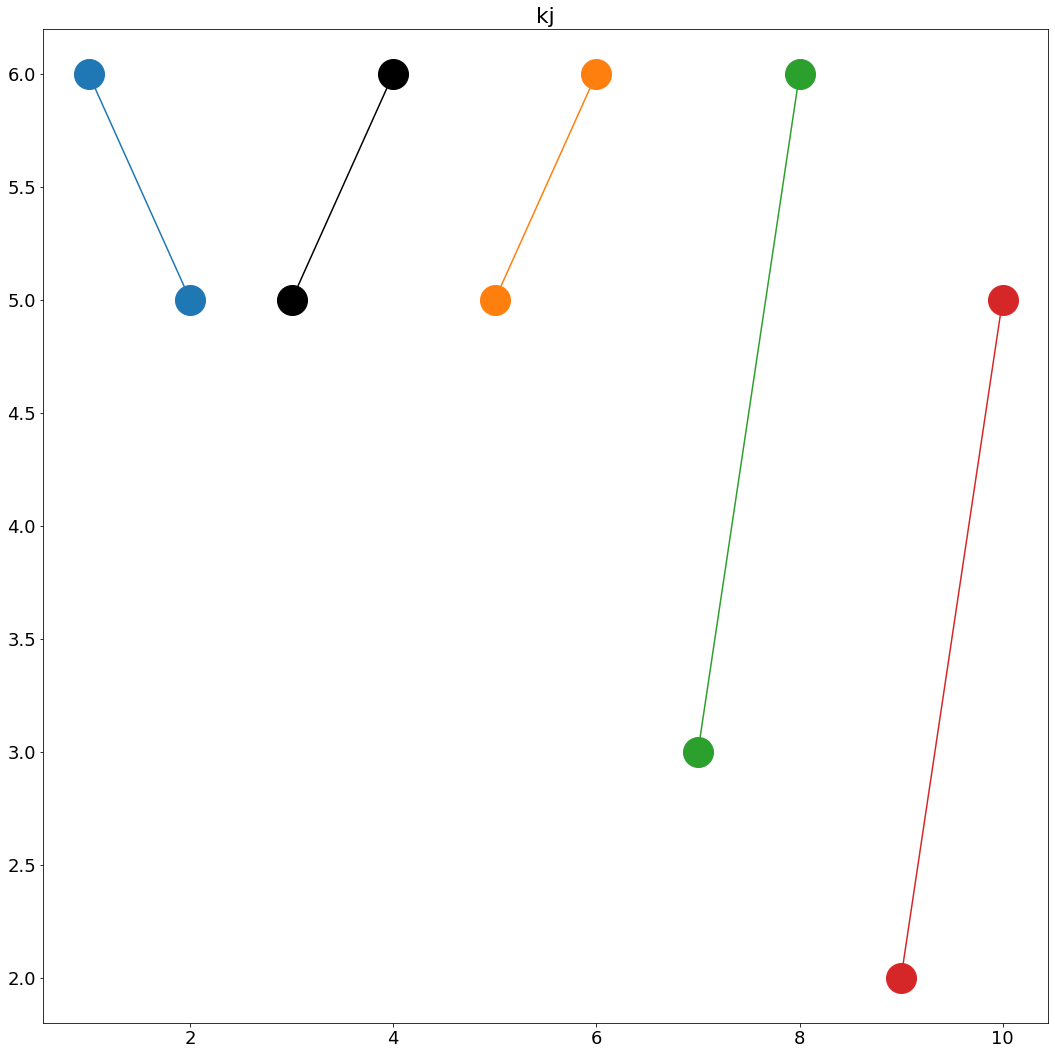

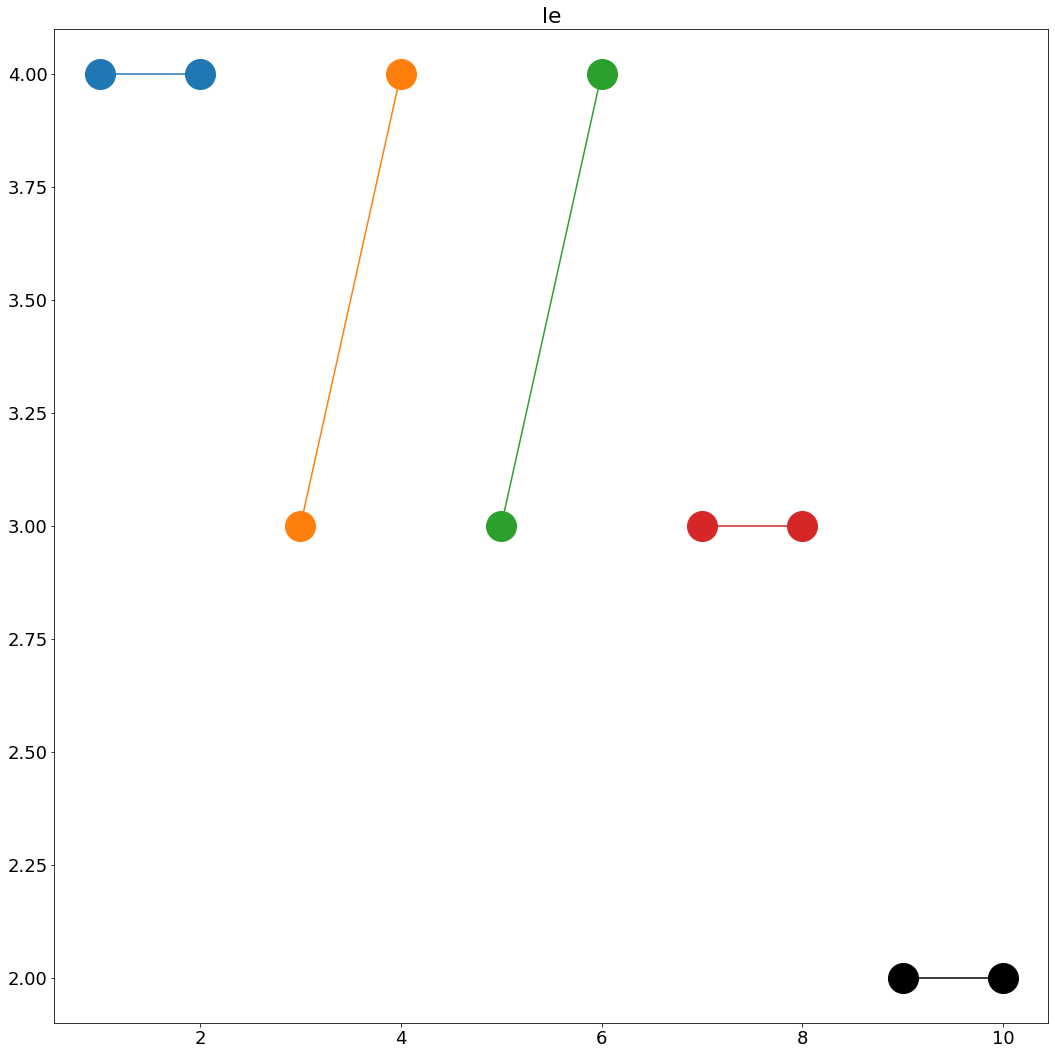

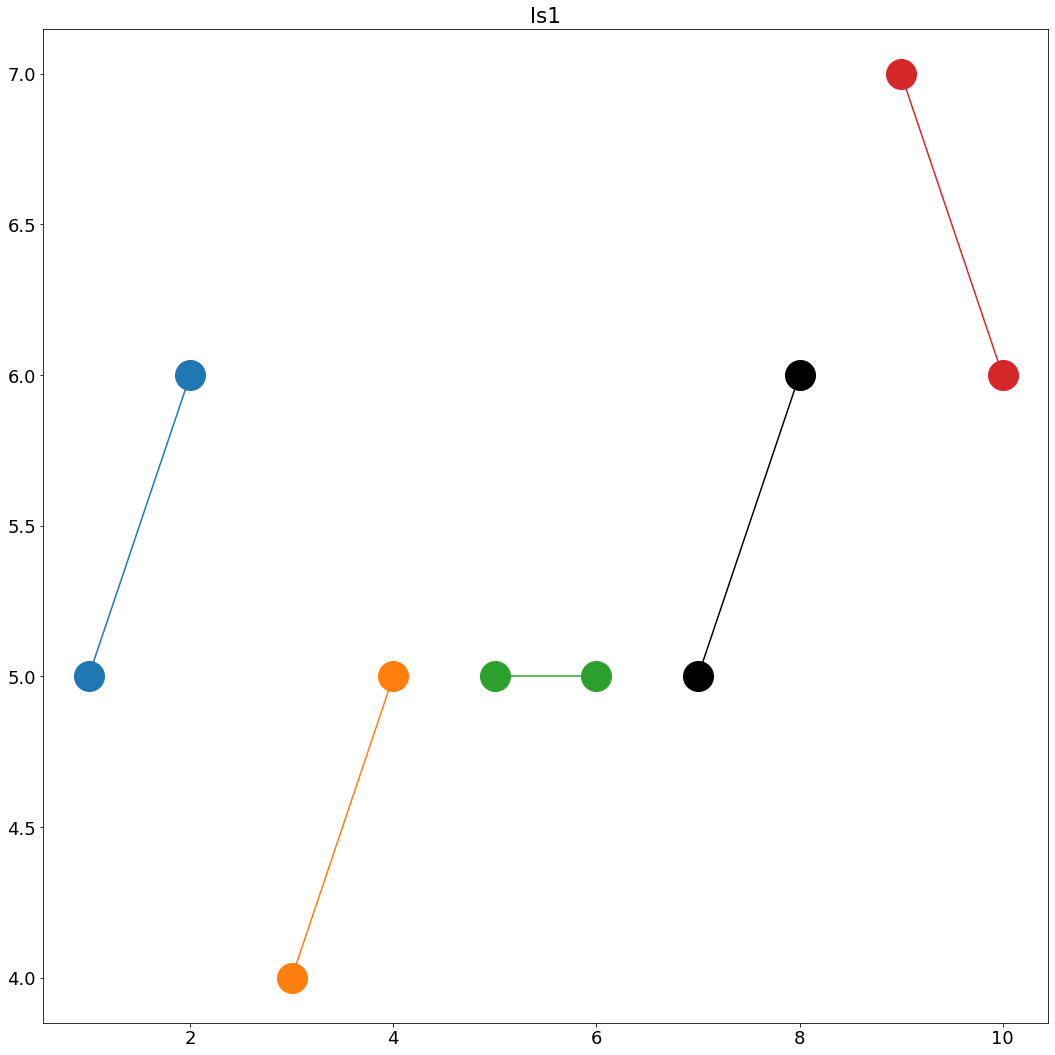

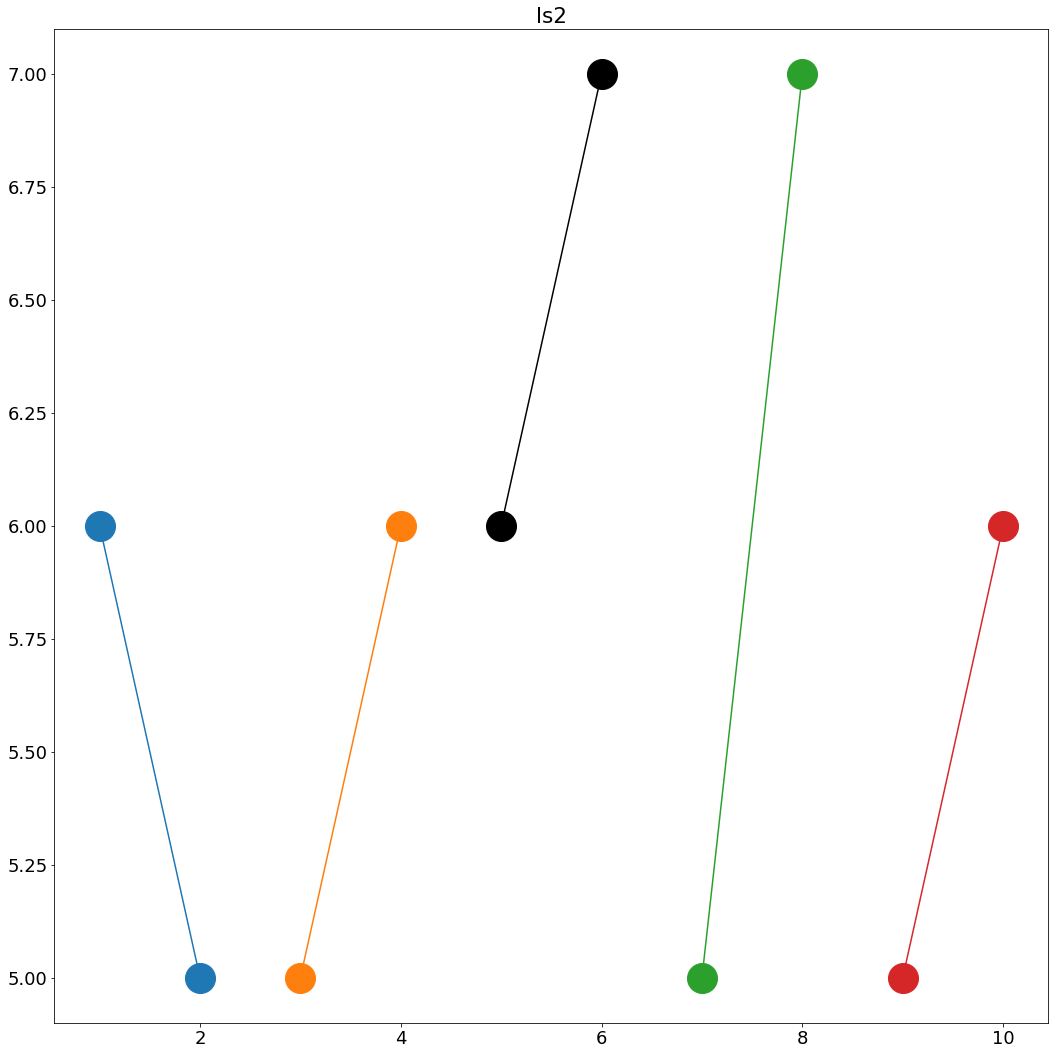

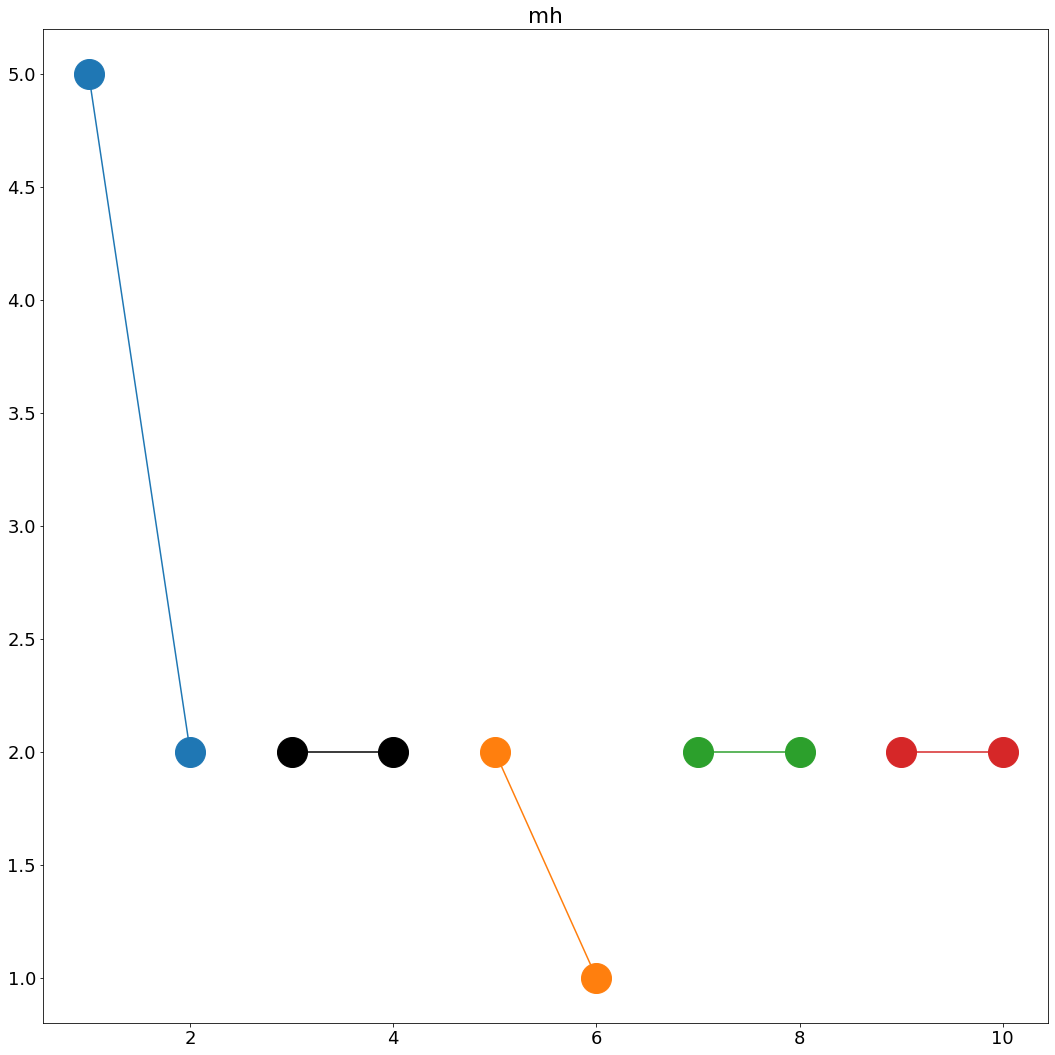

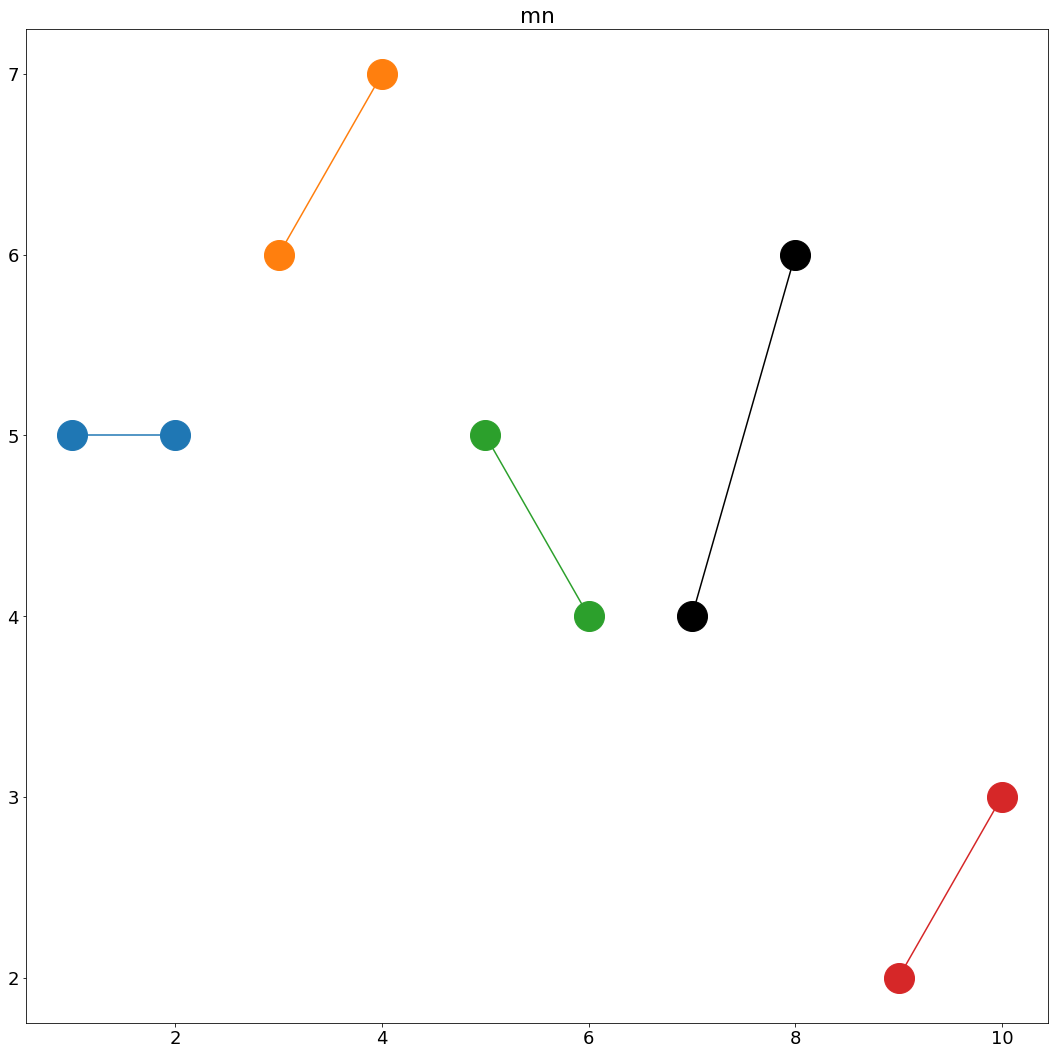

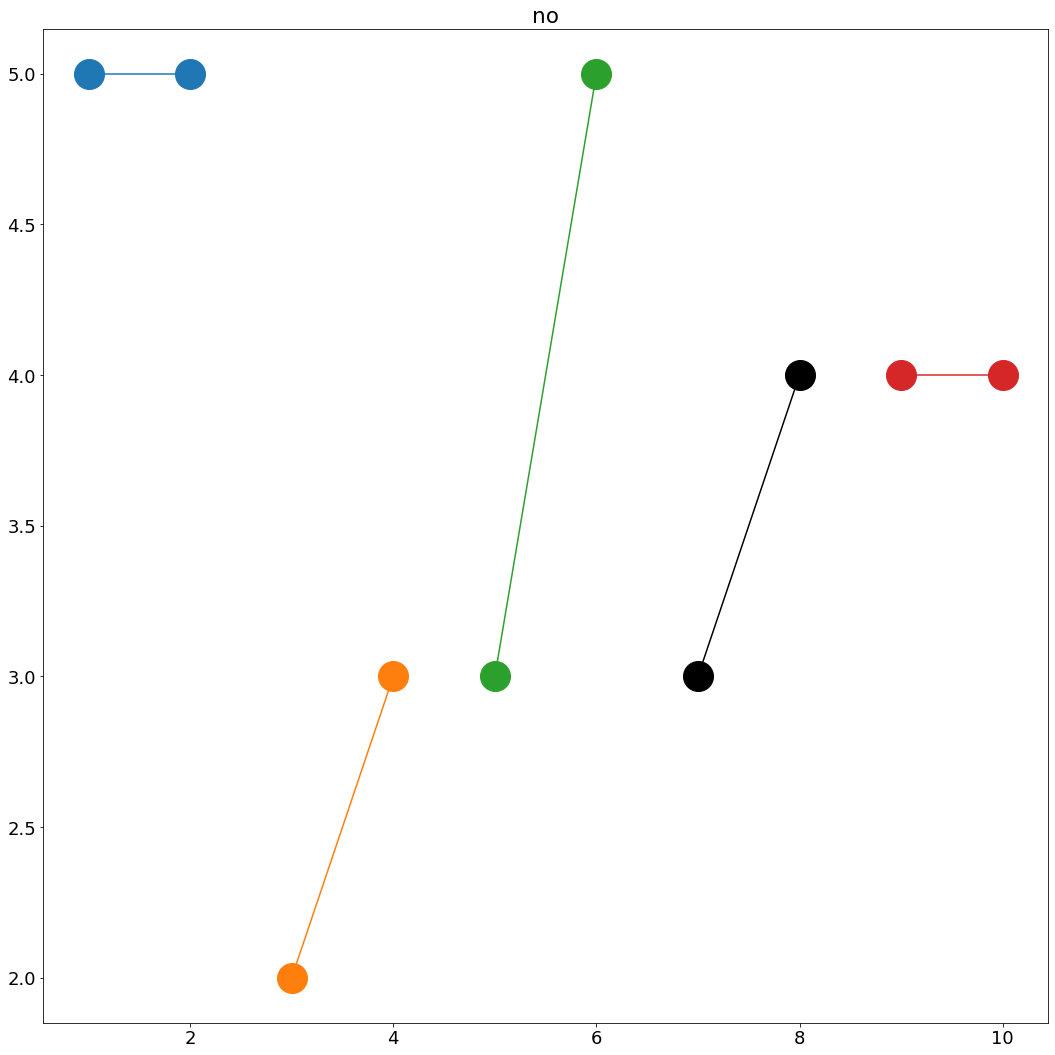

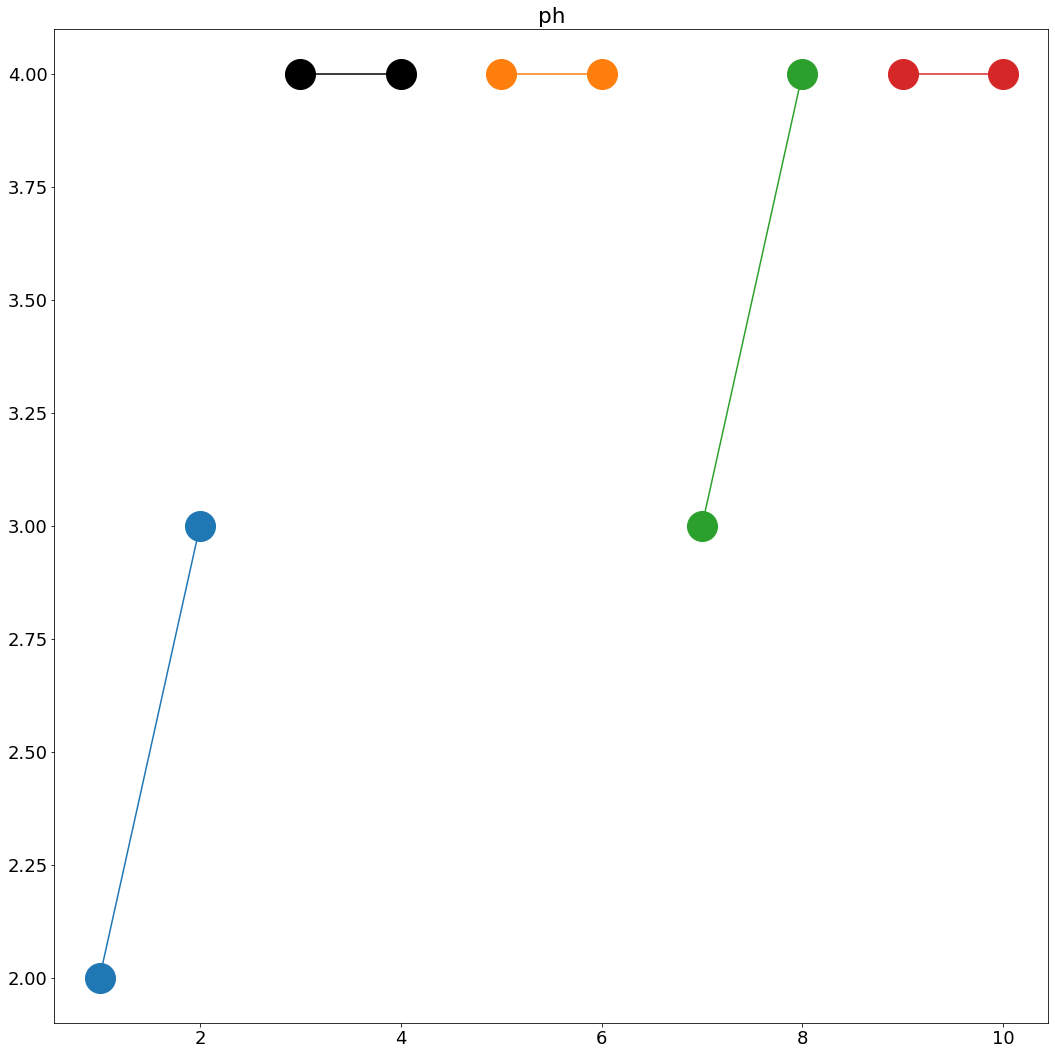

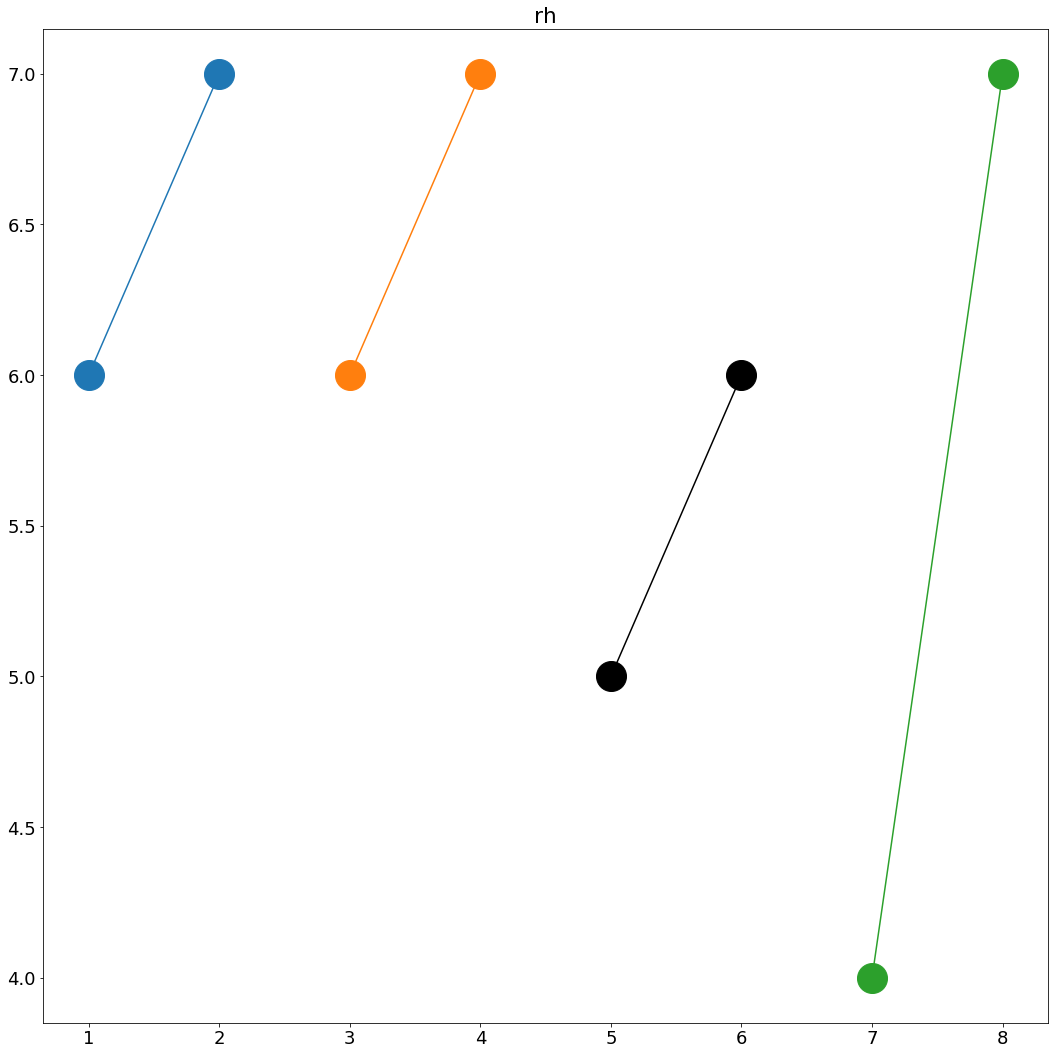

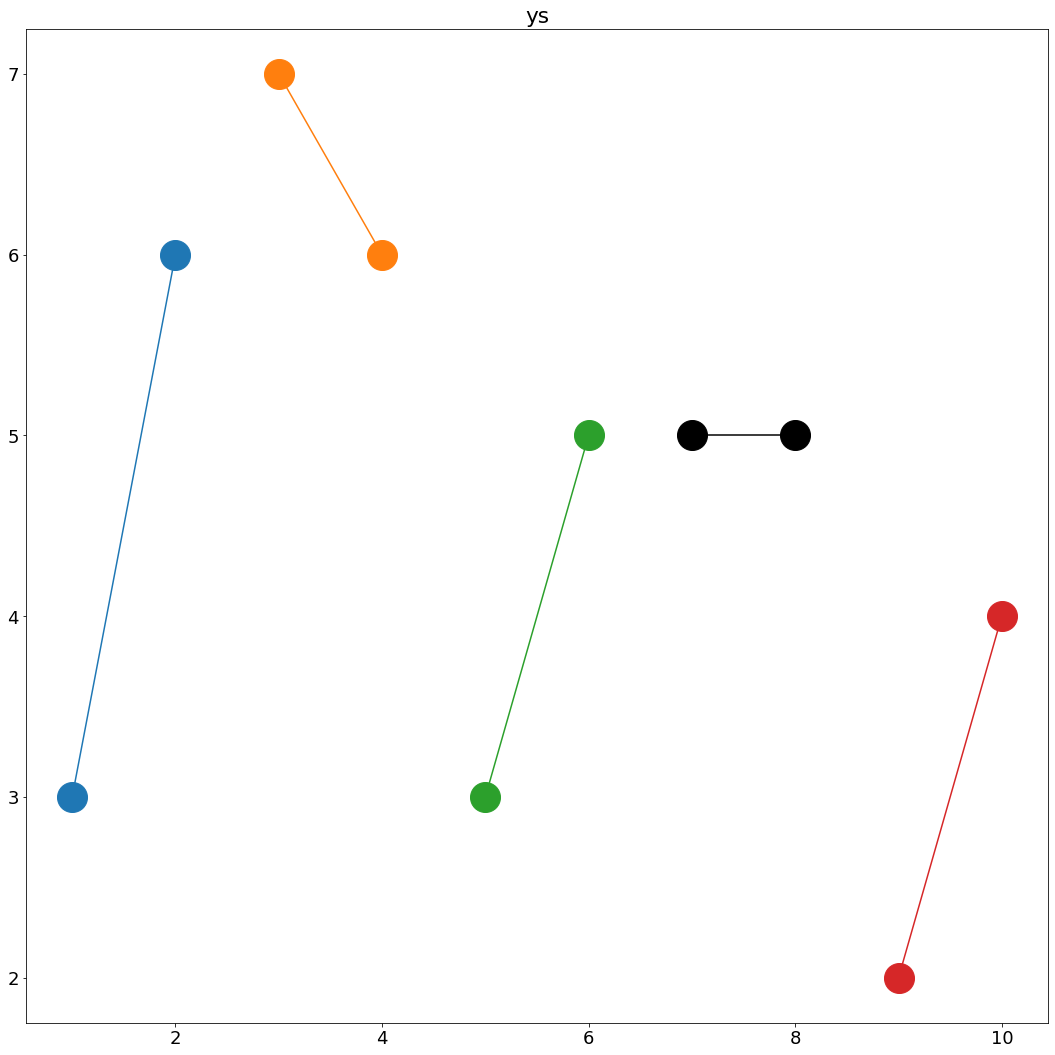

In [38]:

variable = 'FatigueDuring'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12



subjectlist = ['ac', 'af', 'aq', 'bh1', 'bh2', 'cw', 'jm', 'jp', 'kj', 'le', 'ls1', 'ls2', 'mh', 'mn', 'no', 'ph', 'rh', \
               'ys'] 

list1 = list()
x_list1 = list()

for subject in subjectlist:
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    for ind, day in enumerate(np.unique(df1.DayDT)):
        #print(ind, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), \
                                            #df1.DayDT==day)])
        
        
        if day==0:
            xAxis = [int(df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0][0])*2-1, \
                 int(df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0][0])*2]
            p1 = ax1.plot(xAxis, df1[variable][np.logical_and(df1.Subject==subject, df1.DayDT==day)], marker = 'o', ms=30, color = \
                      'black')
            continue
    
        xAxis = [df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0]*2-1, \
                 df1['Day'][np.logical_and(df1.Subject==subject, df1.DayDT==day)].tolist()[0]*2]
        
        p1 = ax1.plot(xAxis, df1[variable][np.logical_and(df1.Subject==subject, df1.DayDT==day)], marker = 'o', ms=30)
    
    
    
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.set_title(subject)
    
    plt.tight_layout()
    fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDuring_' + subject + '.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

## Numbers

In [50]:
print('Number of days where participants were more tired at the end of the day')
print(df1[df1.FatigueDifference_day>0].count())


print('Number of days where participants were less tired at the end of the day')
print(df1[df1.FatigueDifference_day<0].count())


print('Number of days where participants were the same tired at the end of the day')
print(df1[df1.FatigueDifference_day==0].count())


Number of days where participants were more tired at the end of the day
0                        52
Subject                  52
DayDT                    52
DayNr                    52
Day                      52
Session                  52
SessionDifficulty        52
FatigueBeforeEye          0
FatigueBefore            52
FatigueAfter             52
FatigueDuring            52
FatigueDifference        52
FatigueDifference_day    52
dtype: int64
Number of days where participants were less tired at the end of the day
0                        11
Subject                  11
DayDT                    11
DayNr                    11
Day                      11
Session                  11
SessionDifficulty        11
FatigueBeforeEye          0
FatigueBefore            10
FatigueAfter              9
FatigueDuring            10
FatigueDifference        11
FatigueDifference_day    11
dtype: int64
Number of days where participants were the same tired at the end of the day
0                        2

In [53]:
print('Number of sessions where participants were more tired at the end of it')
print(df1[df1.FatigueDifference>0].count())


print('Number of sessions where participants were less tired at the end of it')
print(df1[df1.FatigueDifference<0].count())


print('Number of sessions where participants were equally tired at the end of it')
print(df1[df1.FatigueDifference==0].count())


Number of sessions where participants were more tired at the end of it
0                        79
Subject                  79
DayDT                    79
DayNr                    79
Day                      79
Session                  79
SessionDifficulty        79
FatigueBeforeEye          5
FatigueBefore            74
FatigueAfter             79
FatigueDuring            79
FatigueDifference        79
FatigueDifference_day    44
dtype: int64
Number of sessions where participants were less tired at the end of it
0                        29
Subject                  29
DayDT                    29
DayNr                    29
Day                      29
Session                  29
SessionDifficulty        29
FatigueBeforeEye          0
FatigueBefore            29
FatigueAfter             27
FatigueDuring            28
FatigueDifference        29
FatigueDifference_day    12
dtype: int64
Number of sessions where participants were equally tired at the end of it
0                        72
Su

In [15]:
subjectlist = ['ac', 'af', 'aq', 'bh1', 'bh2', 'cw', 'jm', 'jp', 'kj', 'le', 'ls1', 'ls2', 'mh', 'mn', 'no', 'ph', 'rh', \
               'ys'] 

nMore, nLess, nSame = 0,0,0
nMore_subjectList, nLess_subjectList, nSame_subjectList = list(), list(), list()

for subject in subjectlist: 
    
    for day in np.unique(df1.DayDT):
        
        
        if np.isnan(df1.FatigueDuring[np.logical_and(np.logical_and(df1.DayDT==day, df1.Subject==subject), \
            df1.Session==1)].tolist()[0]) or np.isnan(df1.FatigueDuring[np.logical_and(np.logical_and(df1.DayDT==day, \
            df1.Subject==subject), df1.Session==2)].tolist()[0]):
            continue
        
        FatigueDuringDifference_session2_1 = int(df1.FatigueDuring[np.logical_and(np.logical_and(df1.DayDT==day, \
            df1.Subject==subject), df1.Session==2)]) - int(df1.FatigueDuring[np.logical_and(np.logical_and(df1.DayDT==day,\
            df1.Subject==subject), df1.Session==1)])
        
        dayActual = df1.Day[np.logical_and(np.logical_and(df1.DayDT==day, df1.Subject==subject), df1.Session==2)].tolist()[0]
        
        subject_day = subject + '__' + str(dayActual)

        if FatigueDuringDifference_session2_1 > 0:
            nMore = nMore + 1
            nMore_subjectList.append(subject_day)
            
        elif FatigueDuringDifference_session2_1 < 0:
            nLess = nLess + 1
            nLess_subjectList.append(subject_day)
            
        elif FatigueDuringDifference_session2_1 == 0:
            nSame = nSame + 1
            nSame_subjectList.append(subject_day)
            
print('Number of days where participants were more tired in the second session than the first')
print(nMore)

print('Number of days where participants were less tired in the second session than the first')
print(nLess)

print('Number of days where participants were equally tired in the second session as the first')
print(nSame)

Number of days where participants were more tired in the second session than the first
45
Number of days where participants were less tired in the second session than the first
18
Number of days where participants were equally tired in the second session as the first
26


In [14]:
print(nMore_subjectList)

['ac__3_MS', 'ac__4', 'ac__5', 'af__2', 'af__5', 'aq__5_MS', 'aq__2', 'aq__4', 'bh1__1', 'bh1__3', 'bh2__2', 'cw__1', 'jm__2_MS', 'jm__1', 'jm__4', 'jp__2_MS', 'jp__3', 'kj__2_MS', 'kj__3', 'kj__4', 'kj__5', 'le__2', 'le__3', 'ls1__4_MS', 'ls1__1', 'ls1__2', 'ls2__3_MS', 'ls2__2', 'ls2__4', 'ls2__5', 'mn__4_MS', 'mn__2', 'mn__5', 'no__4_MS', 'no__2', 'no__3', 'ph__1', 'ph__4', 'rh__3_MS', 'rh__1', 'rh__2', 'rh__4', 'ys__1', 'ys__3', 'ys__5']
